# Step-1: Bussiness Problem Understanding
- The primary objective is to build a predictive model that accurately predicts whether a person gets a loan or not

# Step-2: Data Understanding
- shape, size, info
- understand each and every variable(column_name) by applying unique(), value_counts()
- List the discrete and continuous variables separately   
**Descriptive statistics**   
  - For continuous, apply describe()   
  - For discrete, apply value_counts()     
**Explanatory Data Analysis**---EDA   
  - Understanding the raw data by applying pandas,matplotlib,seaborn
  - check and list  
     -missing values   
     -outliers   
     -skewed   
     -discrete nominal and discrete ordinal

**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

**Importing/Loading the data**

In [3]:
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.size

7982

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Descriptive Statistics**

In [8]:
df["Loan_ID"].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [9]:
df["Loan_ID"].value_counts()

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [10]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [12]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [14]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [15]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [16]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [18]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [20]:
df["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [21]:
df["ApplicantIncome"].value_counts()

ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

In [22]:
df["CoapplicantIncome"].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [23]:
df["CoapplicantIncome"].value_counts()

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

In [24]:
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [25]:

df["LoanAmount"].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [26]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [28]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [29]:
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [30]:
df["Credit_History"].replace({1:"Good",0:"Bad"},inplace=True)

In [31]:
df["Credit_History"].unique()

array(['Good', 'Bad', nan], dtype=object)

In [32]:
df["Credit_History"].value_counts()

Credit_History
Good    475
Bad      89
Name: count, dtype: int64

In [33]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [34]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [35]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [36]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [37]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
continuous=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
discrete_categorical=['Gender', 'Married','Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status']
discrete_count=['Dependents','Loan_Amount_Term']

In [39]:
df[continuous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


**Explanatory Data Analysis**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


**continuous**

**ApplicantIncome**
- Histogram
- Boxplot

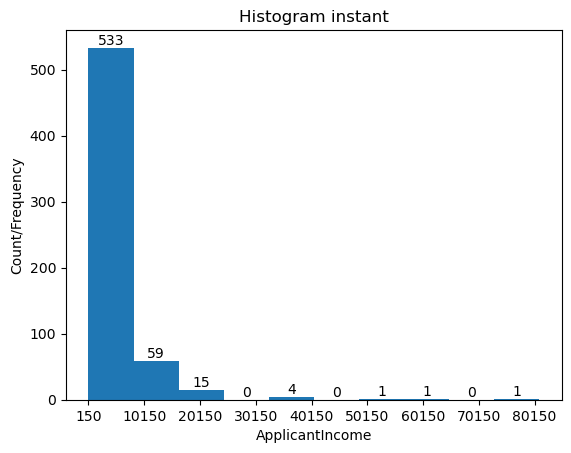

In [41]:
# ApplicantIncome-----Histogram
n,bins,patches=plt.hist(df["ApplicantIncome"],bins=10,range=(150,81000))
plt.bar_label(patches)                                             # count of each bar
plt.xlabel("ApplicantIncome")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                      # set the label for the y-axis
plt.title("Histogram instant")                                     # set title for the plot
plt.xticks(list(range(150,81000,10000)))                                  # x-axis values presentation
plt.show()

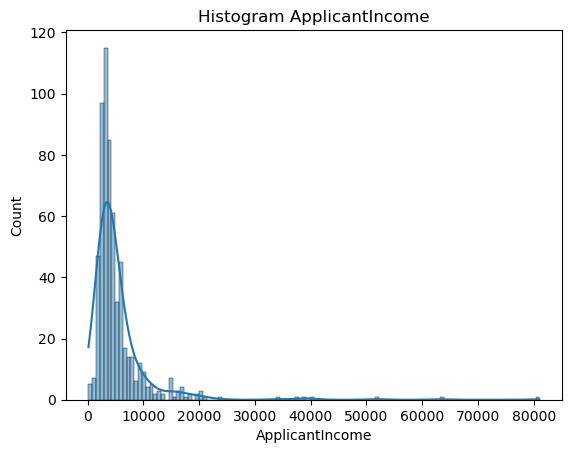

In [42]:
# ApplicantIncome-----Histogram
plt.title("Histogram ApplicantIncome")

sns.histplot(df["ApplicantIncome"],kde=True)
plt.show()

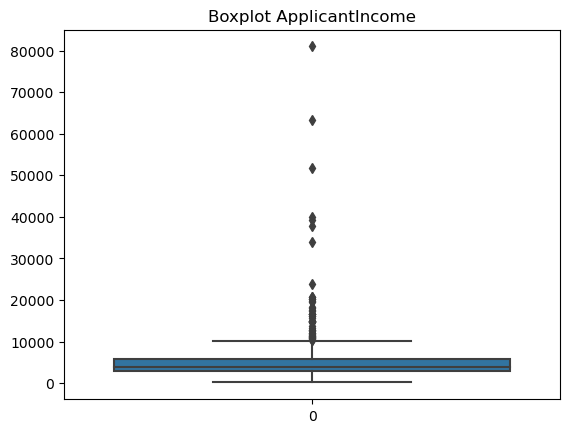

In [43]:
# BOXPLOT
plt.title("Boxplot ApplicantIncome")

sns.boxplot(df["ApplicantIncome"])
plt.show()

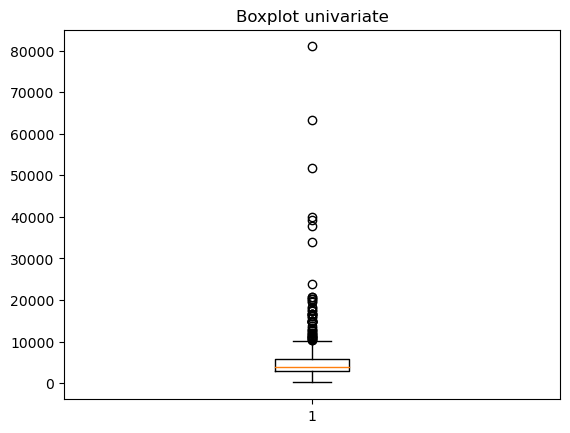

In [44]:
# Boxplot-----ApplicantIncome
plt.title("Boxplot univariate")

plt.boxplot(df["ApplicantIncome"])
plt.show()

**CoapplicantIncome**
- Histogram
- Boxplot

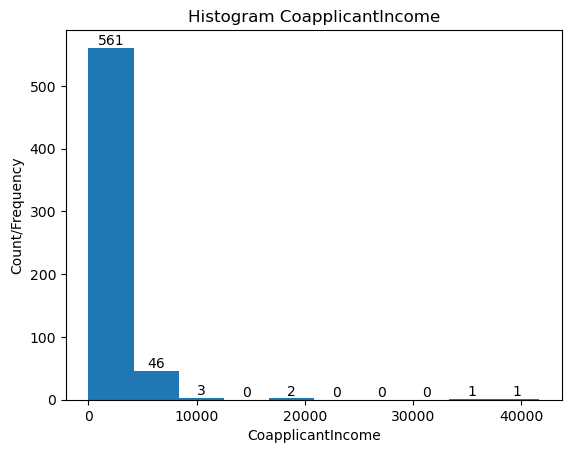

In [45]:
# CoapplicantIncome-----Histogram
n,bins,patches=plt.hist(df["CoapplicantIncome"],bins=10,range=(0,41670))
plt.bar_label(patches)                                             # count of each bar
plt.xlabel("CoapplicantIncome")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                      # set the label for the y-axis
plt.title("Histogram CoapplicantIncome")                                     # set title for the plot
plt.xticks(list(range(0,41670,10000)))                                  # x-axis values presentation
plt.show()

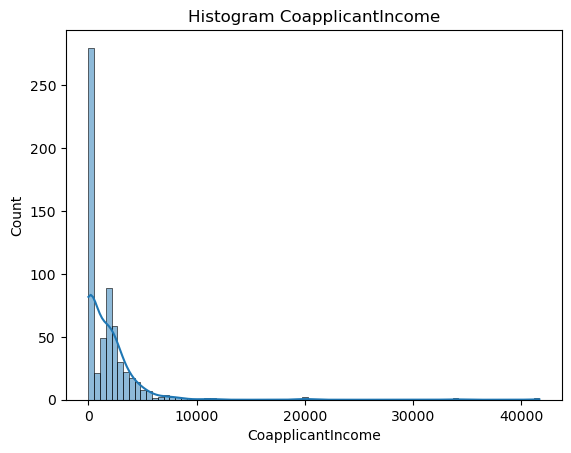

In [46]:
# CoapplicantIncome-----Histogram
plt.title("Histogram CoapplicantIncome")

sns.histplot(df["CoapplicantIncome"],kde=True)
plt.show()

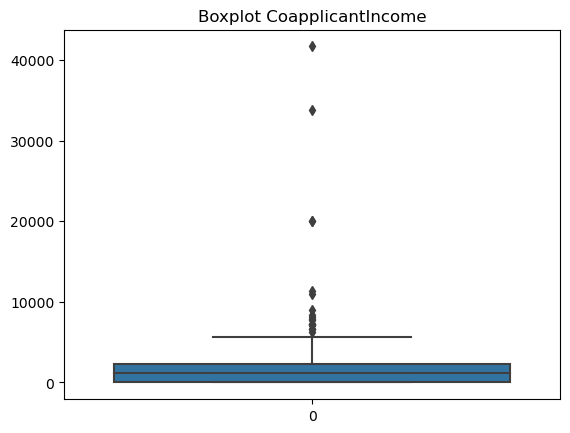

In [47]:
# BOXPLOT
plt.title("Boxplot CoapplicantIncome")

sns.boxplot(df["CoapplicantIncome"])
plt.show()

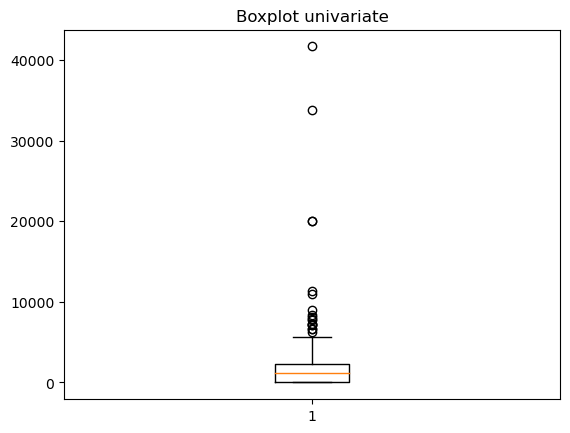

In [48]:
# Boxplot-----CoapplicantIncome
plt.title("Boxplot univariate")

plt.boxplot(df["CoapplicantIncome"])
plt.show()

**LoanAmount**
- Histogram
- Boxplot

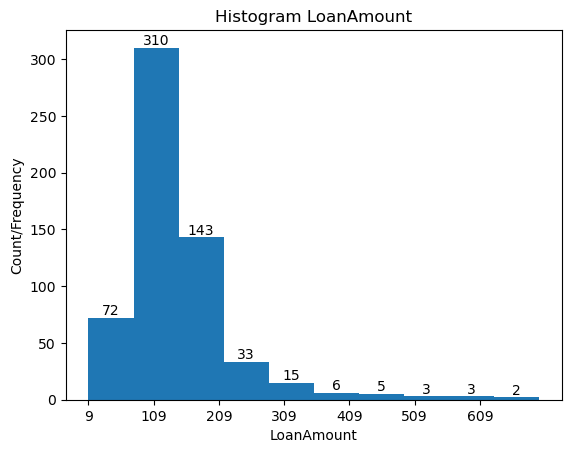

In [49]:
# LoanAmount-----Histogram
n,bins,patches=plt.hist(df["LoanAmount"],bins=10,range=(9,700))
plt.bar_label(patches)                                             # count of each bar
plt.xlabel("LoanAmount")                                              # set the label for the x-axis
plt.ylabel("Count/Frequency")                                      # set the label for the y-axis
plt.title("Histogram LoanAmount")                                     # set title for the plot
plt.xticks(list(range(9,700,100)))                                  # x-axis values presentation
plt.show()

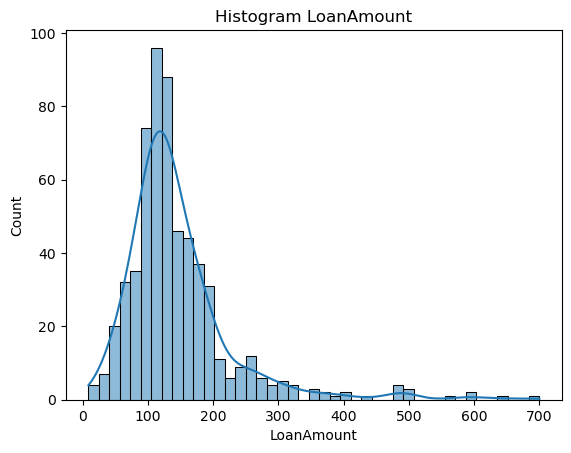

In [50]:
# LoanAmount-----Histogram
plt.title("Histogram LoanAmount")

sns.histplot(df["LoanAmount"],kde=True)
plt.show()

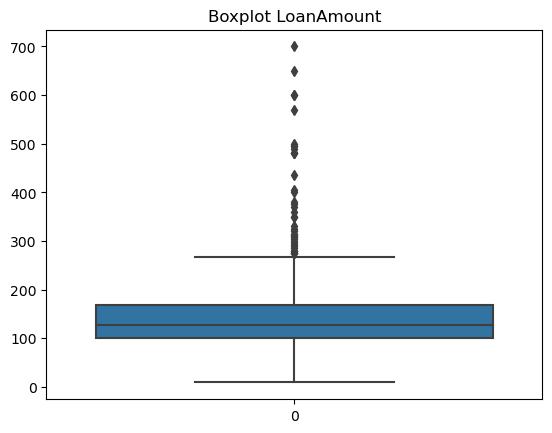

In [51]:
# BOXPLOT
plt.title("Boxplot LoanAmount")

sns.boxplot(df["LoanAmount"])
plt.show()

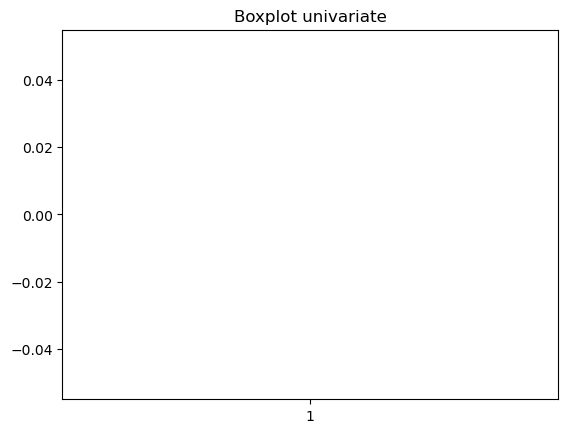

In [52]:
# Boxplot-----LoanAmount
plt.title("Boxplot univariate")

plt.boxplot(df["LoanAmount"])
plt.show()

**ApplicantIncome-Loan_Status**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

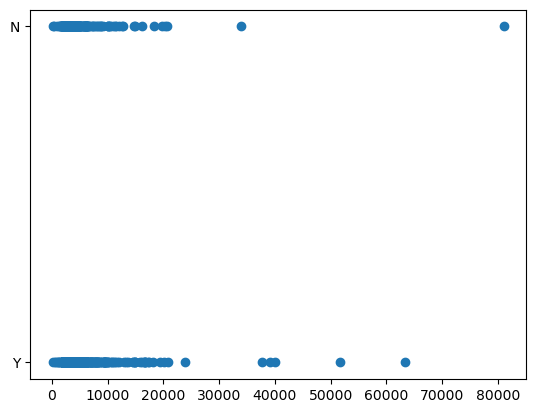

In [53]:
# ApplicantIncome,Loan_Status-----scatterplot
plt.scatter(x=df["ApplicantIncome"],y=df["Loan_Status"])
plt.show()

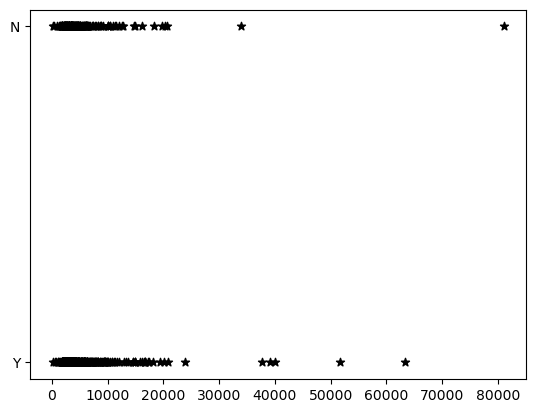

In [54]:
# ApplicantIncome,Loan_Status-----scatterplot
plt.scatter(x=df["ApplicantIncome"],y=df["Loan_Status"],marker="*",color="black")
plt.show()

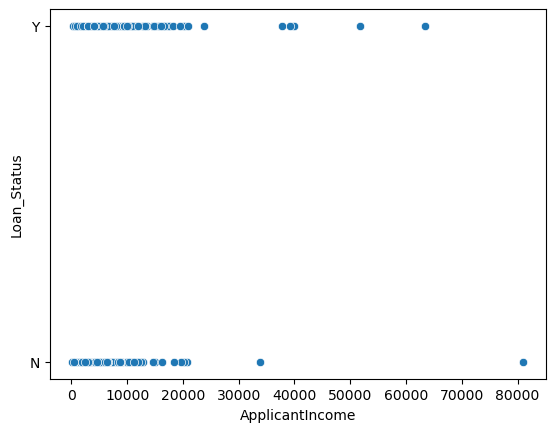

In [55]:
# ApplicantIncome,Loan_Status-----scatterplot
sns.scatterplot(x=df["ApplicantIncome"],y=df["Loan_Status"])
plt.show()

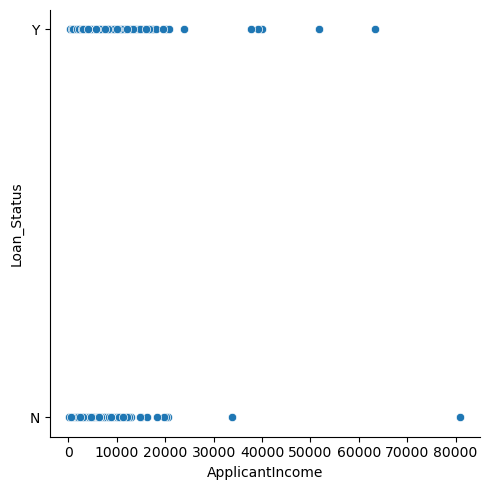

In [56]:
# ApplicantIncome,Loan_Status-----scatterplot
sns.relplot(x=df["ApplicantIncome"],y=df["Loan_Status"])
plt.show()

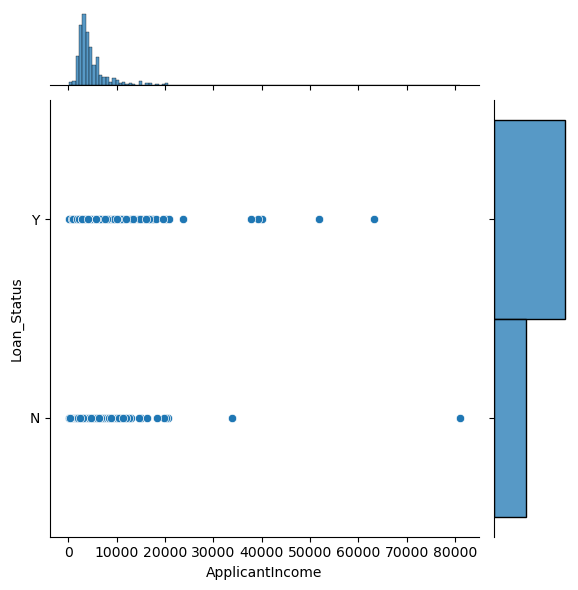

In [57]:
# ApplicantIncome,Loan_Status-----jointplot
sns.jointplot(x=df["ApplicantIncome"],y=df["Loan_Status"])
plt.show()

**CoapplicantIncome-Loan_Status**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

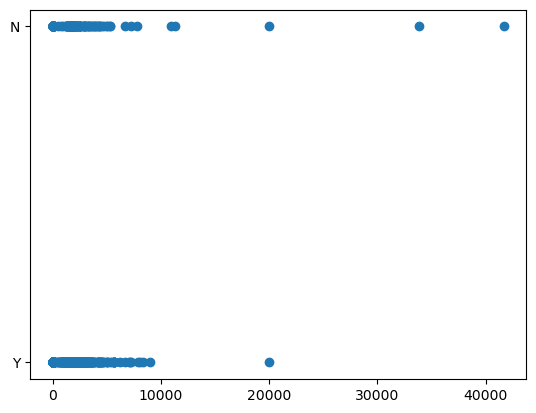

In [58]:
# CoapplicantIncome,Loan_Status-----scatterplot
plt.scatter(x=df["CoapplicantIncome"],y=df["Loan_Status"])
plt.show()

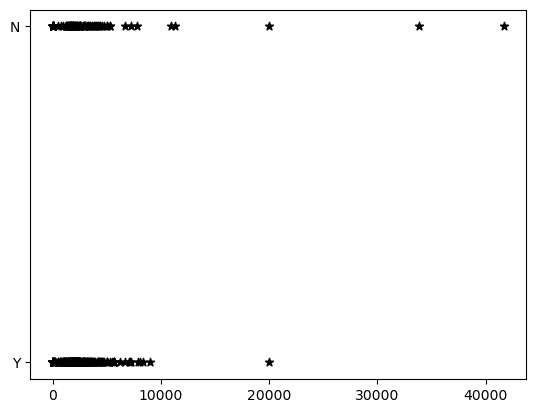

In [59]:
# CoapplicantIncome,Loan_Status-----scatterplot
plt.scatter(x=df["CoapplicantIncome"],y=df["Loan_Status"],marker="*",color="black")
plt.show()

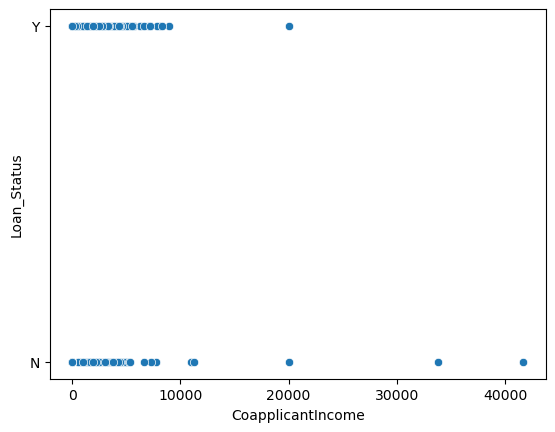

In [60]:
# CoapplicantIncome,Loan_Status-----scatterplot
sns.scatterplot(x=df["CoapplicantIncome"],y=df["Loan_Status"])
plt.show()

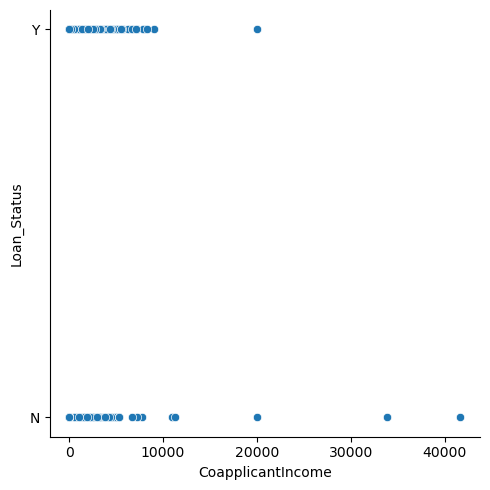

In [61]:
# CoapplicantIncome,Loan_Status-----scatterplot
sns.relplot(x=df["CoapplicantIncome"],y=df["Loan_Status"])
plt.show()

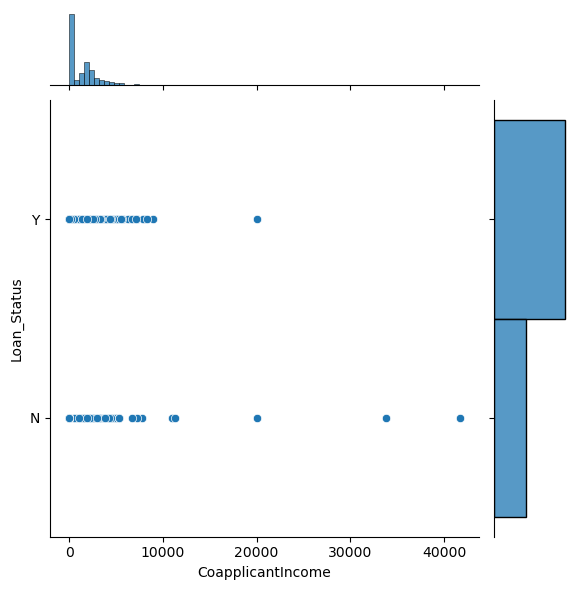

In [62]:
# CoapplicantIncome,Loan_Status-----jointplot
sns.jointplot(x=df["CoapplicantIncome"],y=df["Loan_Status"])
plt.show()

**LoanAmount-Loan_Status**
- Scatterplot
- Relplot
- Jointplot
- Pairplot 

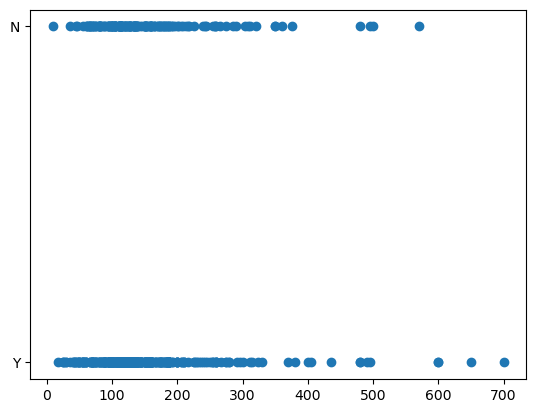

In [63]:
# LoanAmount,Loan_Status-----scatterplot
plt.scatter(x=df["LoanAmount"],y=df["Loan_Status"])
plt.show()

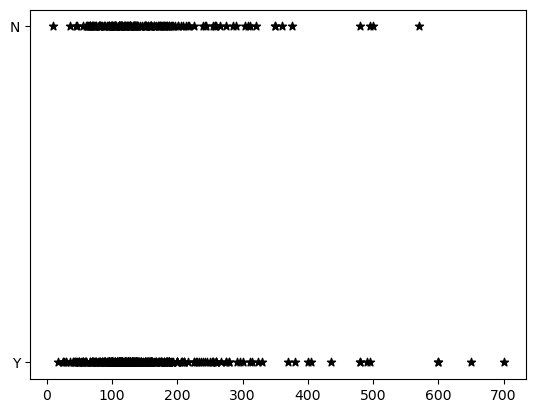

In [64]:
# LoanAmount,Loan_Status-----scatterplot
plt.scatter(x=df["LoanAmount"],y=df["Loan_Status"],marker="*",color="black")
plt.show()

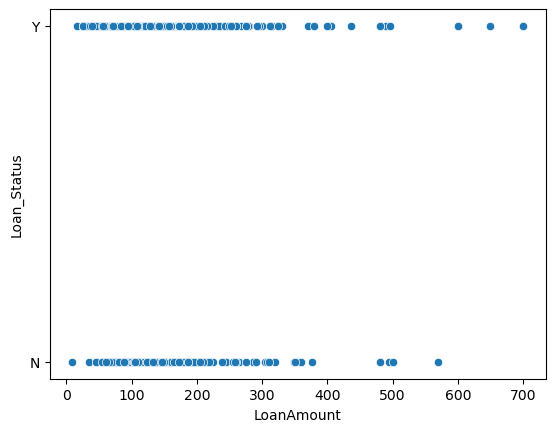

In [65]:
# LoanAmount,Loan_Status-----scatterplot
sns.scatterplot(x=df["LoanAmount"],y=df["Loan_Status"])
plt.show()

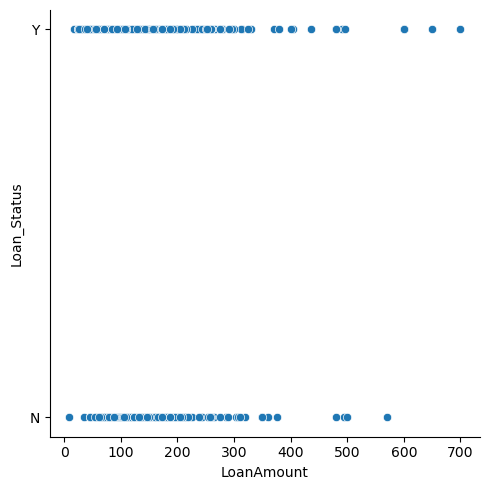

In [66]:
# LoanAmount,Loan_Status-----scatterplot
sns.relplot(x=df["LoanAmount"],y=df["Loan_Status"])
plt.show()

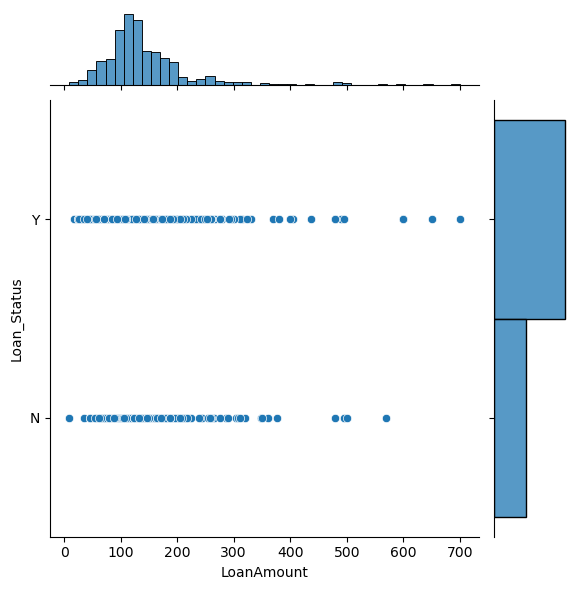

In [67]:
# LoanAmount,Loan_Status-----jointplot
sns.jointplot(x=df["LoanAmount"],y=df["Loan_Status"])
plt.show()

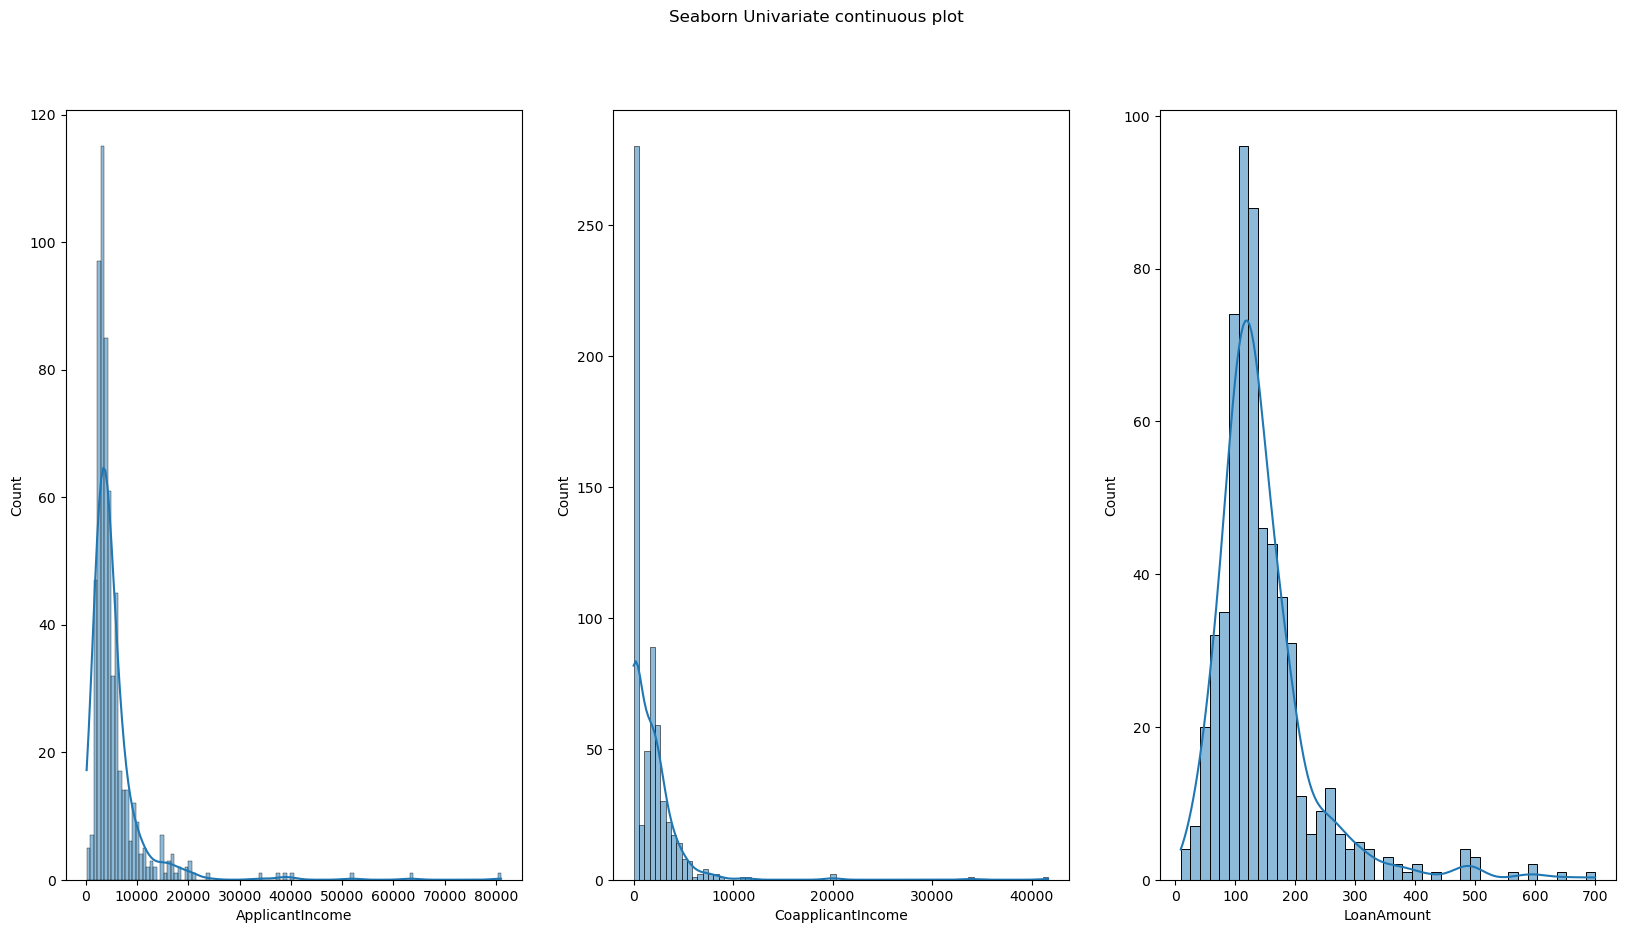

In [68]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(df['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(df['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(df['LoanAmount'],kde=True)
plt.suptitle("Seaborn Univariate continuous plot")
plt.show()

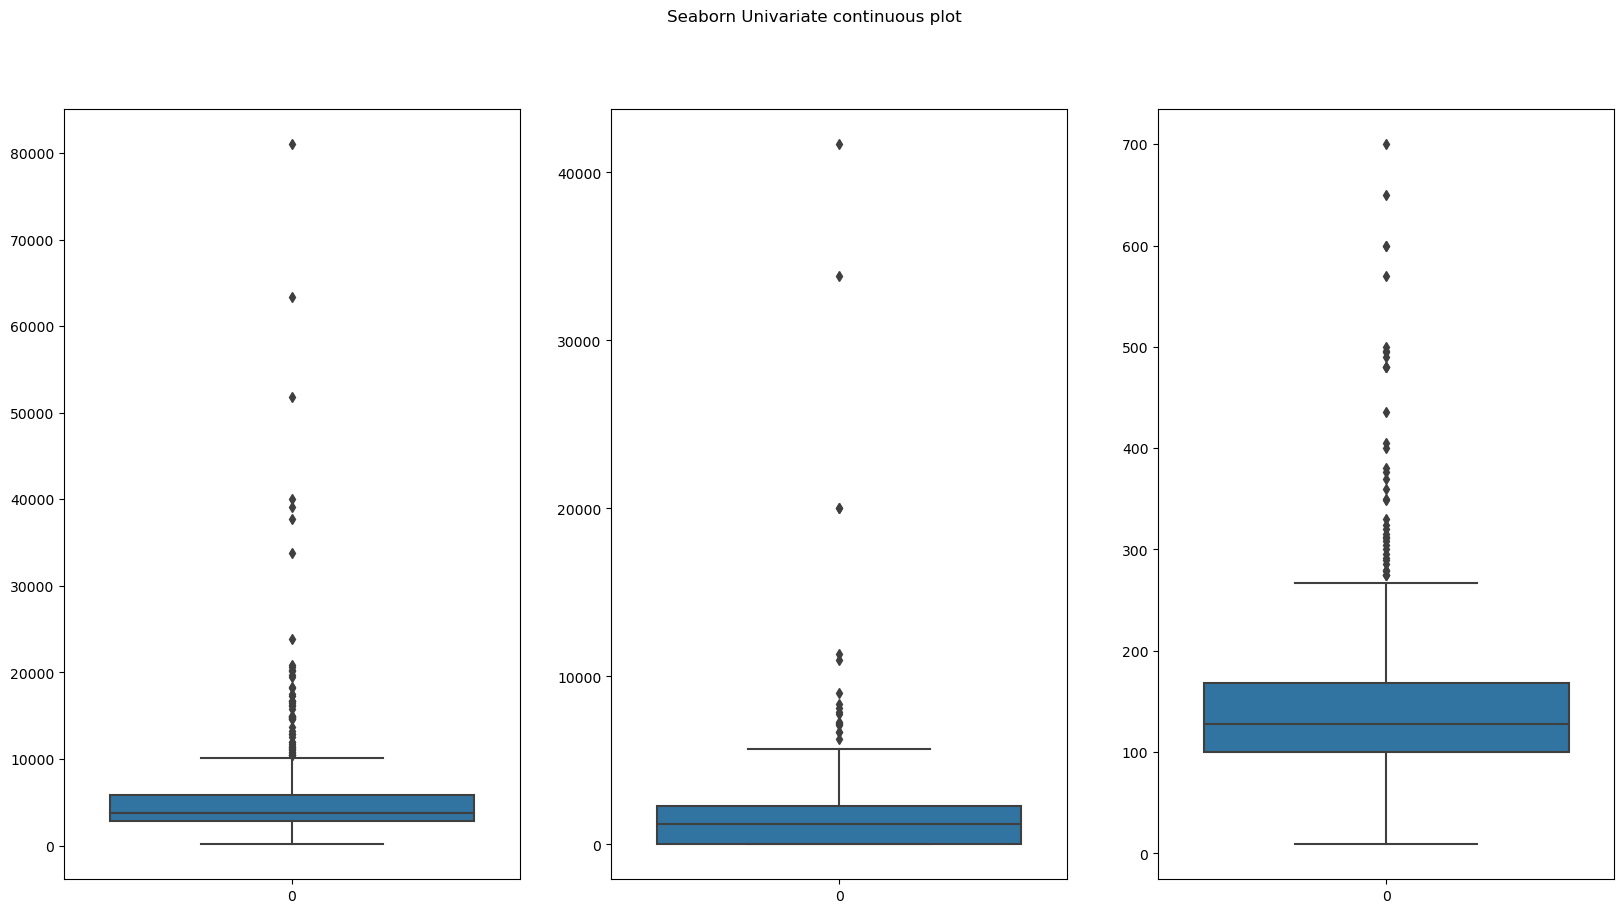

In [69]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])
plt.suptitle("Seaborn Univariate continuous plot")
plt.show()

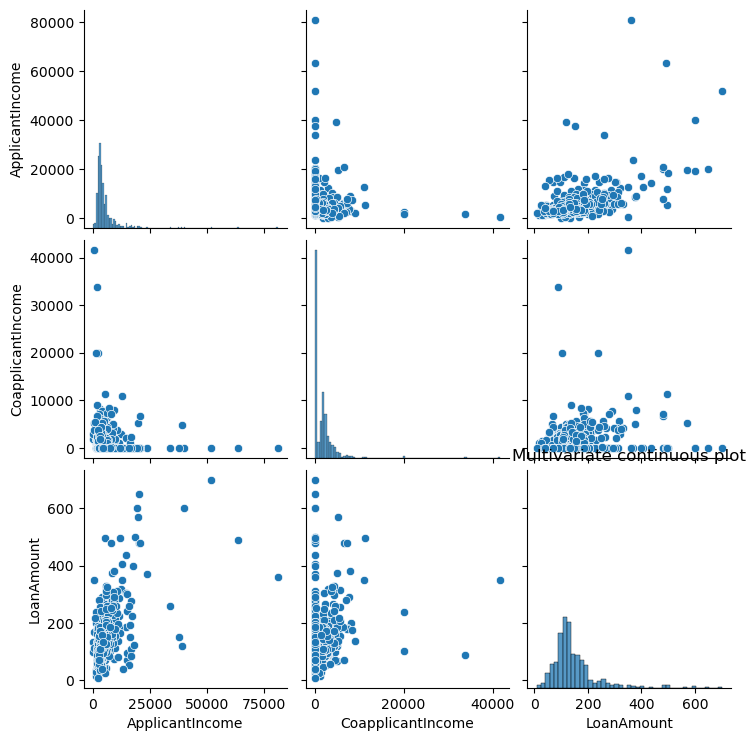

In [70]:
sns.pairplot(df[continuous])

plt.title("Multivariate continuous plot")
plt.show()

In [71]:
df[continuous].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


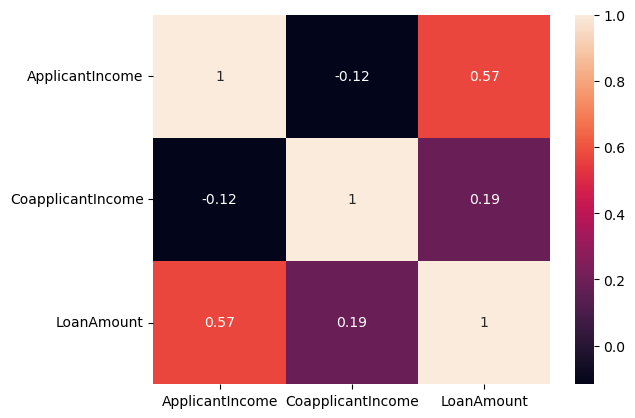

In [72]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

**discrete_categorical**

In [73]:
discrete_categorical

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

**Gender**
- Pieplot
- Barplot
- countplot
- violinplot

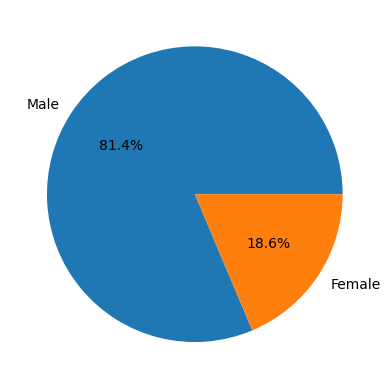

In [74]:
# Gender-----Pieplot
plt.pie(df["Gender"].value_counts(),labels=df["Gender"].value_counts().index.tolist(),autopct="%0.1f%%")
plt.show()

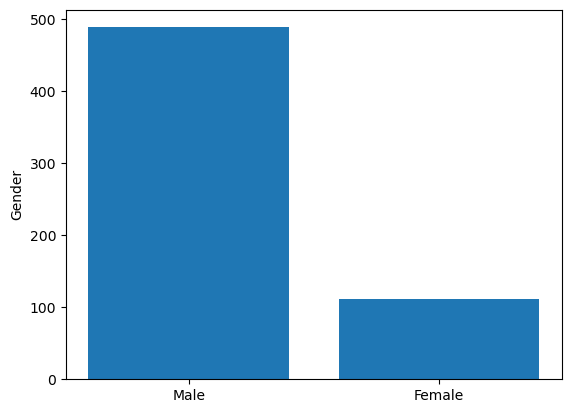

In [75]:
# Gender----Barplot
plt.bar(df["Gender"].value_counts().index,df["Gender"].value_counts())
plt.ylabel("Gender")
plt.show()

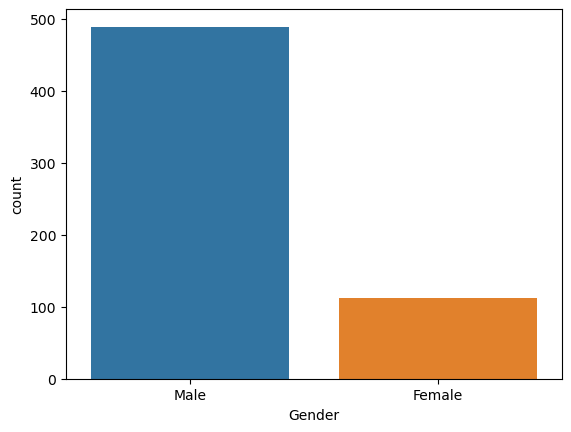

In [76]:
# countplot----season
sns.countplot(x=df["Gender"])
plt.show()

**Married**
- Pieplot
- Barplot
- countplot
- violinplot

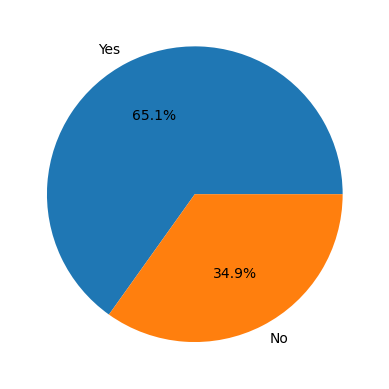

In [77]:
# Married-----Pieplot
plt.pie(df["Married"].value_counts(),labels=df["Married"].value_counts().index.tolist(),autopct="%0.1f%%")
plt.show()

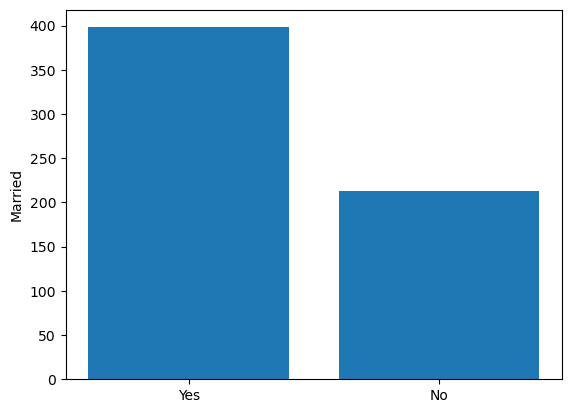

In [78]:
# Married----Barplot
plt.bar(df["Married"].value_counts().index,df["Married"].value_counts())
plt.ylabel("Married")
plt.show()

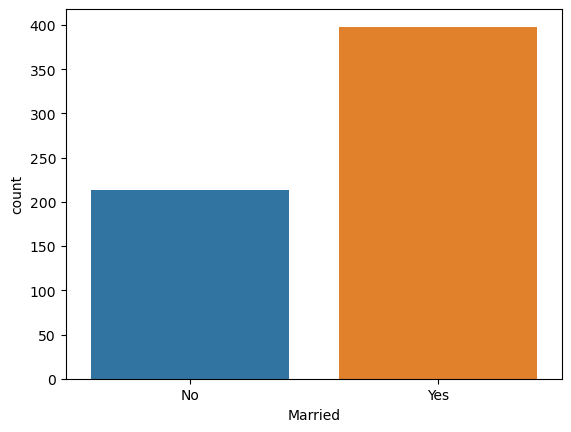

In [79]:
# countplot----Married
sns.countplot(x=df["Married"])
plt.show()

**Education**
- Pieplot
- Barplot
- countplot
- violinplot

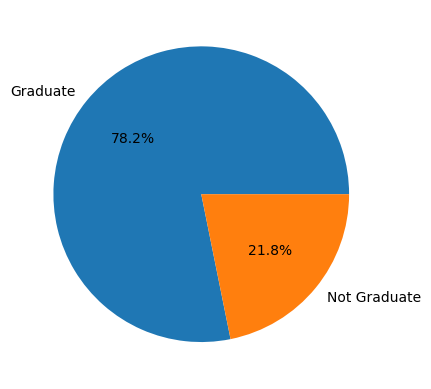

In [80]:
# Education-----Pieplot
plt.pie(df["Education"].value_counts(),labels=df["Education"].unique(),autopct="%0.1f%%")
plt.show()

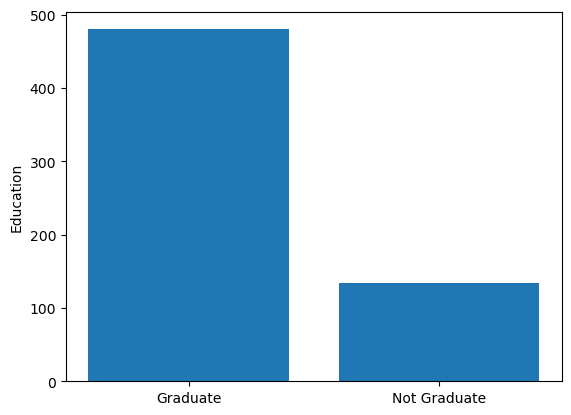

In [81]:
# Education----Barplot
plt.bar(df["Education"].value_counts().index,df["Education"].value_counts())
plt.ylabel("Education")
plt.show()

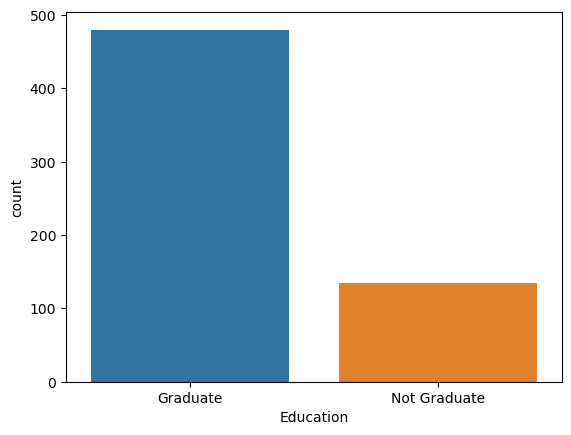

In [82]:
# countplot----Education
sns.countplot(x=df["Education"])
plt.show()

**Self_Employed**
- Pieplot
- Barplot
- countplot
- violinplot

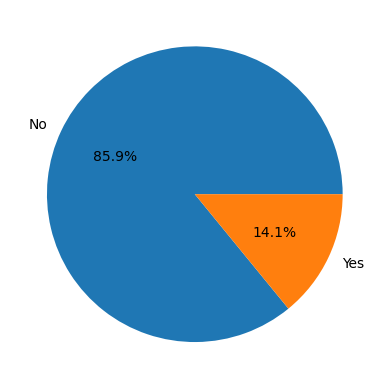

In [83]:
# Self_Employed-----Pieplot
plt.pie(df["Self_Employed"].value_counts(),labels=df["Self_Employed"].value_counts().index.tolist(),autopct="%0.1f%%")
plt.show()

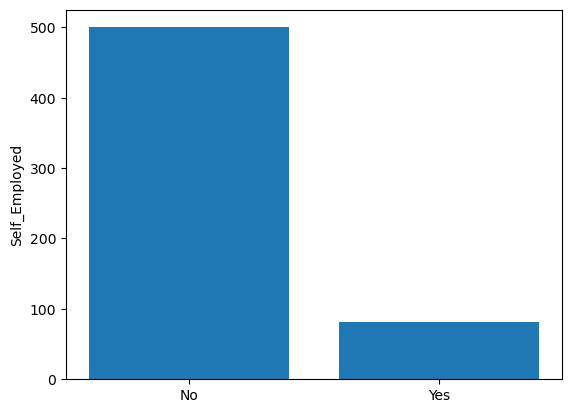

In [84]:
# Self_Employed----Barplot
plt.bar(df["Self_Employed"].value_counts().index,df["Self_Employed"].value_counts())
plt.ylabel("Self_Employed")
plt.show()

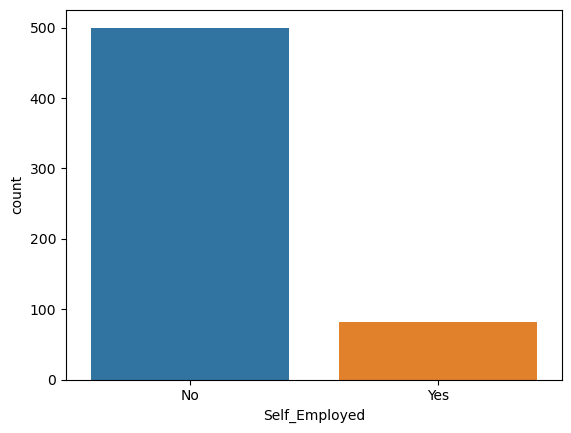

In [85]:
# countplot----Self_Employed
sns.countplot(x=df["Self_Employed"])
plt.show()

**Credit_History**
- Pieplot
- Barplot
- countplot
- violinplot

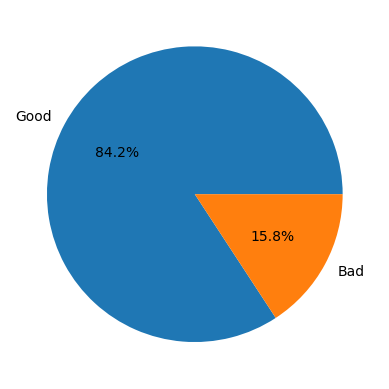

In [86]:
# Credit_History-----Pieplot
plt.pie(df["Credit_History"].value_counts(),labels=df["Credit_History"].value_counts().index.tolist(),autopct="%0.1f%%")
plt.show()

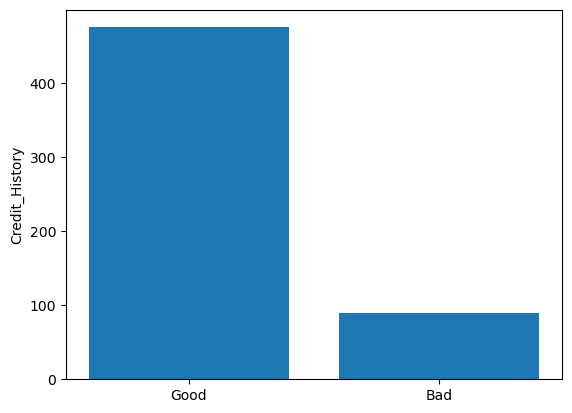

In [87]:
# Credit_History----Barplot
plt.bar(df["Credit_History"].value_counts().index,df["Credit_History"].value_counts())
plt.ylabel("Credit_History")
plt.show()

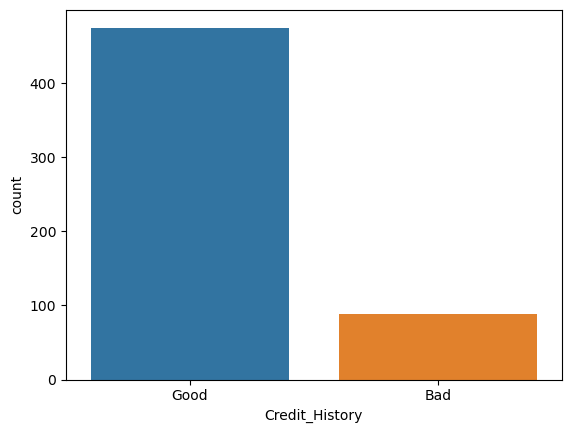

In [88]:
# countplot----Credit_History
sns.countplot(x=df["Credit_History"])
plt.show()

**Property_Area**
- Pieplot
- Barplot
- countplot
- violinplot

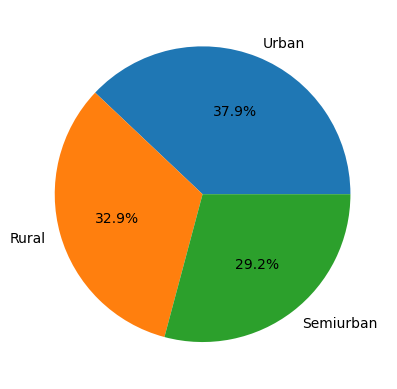

In [89]:
# Property_Area-----Pieplot
plt.pie(df["Property_Area"].value_counts(),labels=df["Property_Area"].unique(),autopct="%0.1f%%")
plt.show()

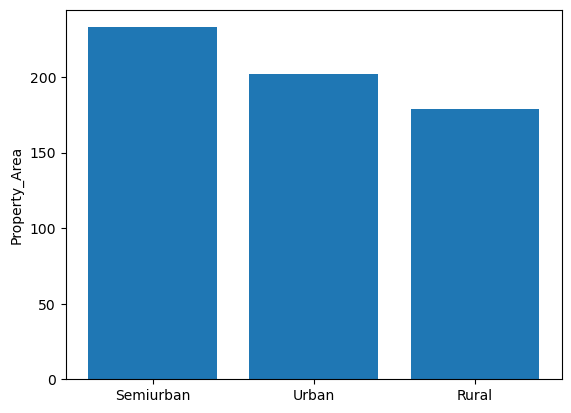

In [90]:
# Property_Area----Barplot
plt.bar(df["Property_Area"].value_counts().index,df["Property_Area"].value_counts())
plt.ylabel("Property_Area")
plt.show()

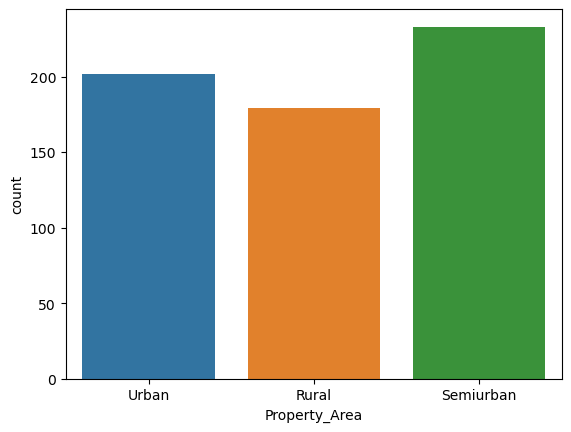

In [91]:
# countplot----Property_Area
sns.countplot(x=df["Property_Area"])
plt.show()

**Loan_Status**
- Pieplot
- Barplot
- countplot
- violinplot

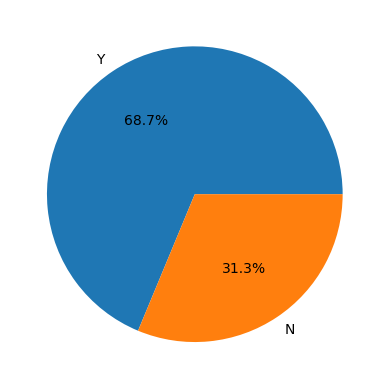

In [92]:
# Loan_Status-----Pieplot
plt.pie(df["Loan_Status"].value_counts(),labels=df["Loan_Status"].unique(),autopct="%0.1f%%")
plt.show()

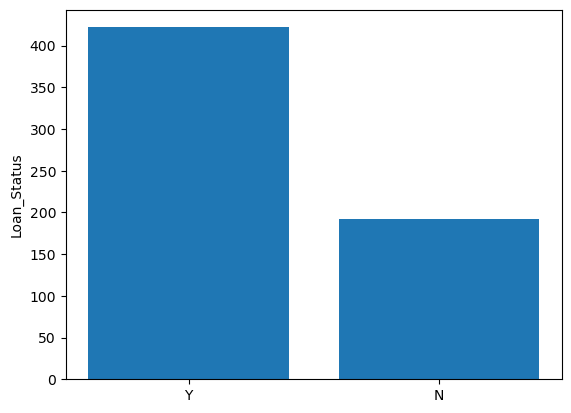

In [93]:
# Loan_Status----Barplot
plt.bar(df["Loan_Status"].value_counts().index,df["Loan_Status"].value_counts())
plt.ylabel("Loan_Status")
plt.show()

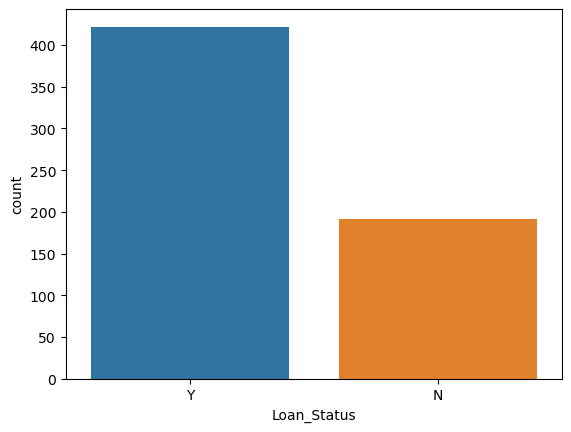

In [94]:
# countplot----Loan_Status
sns.countplot(x=df["Loan_Status"])
plt.show()

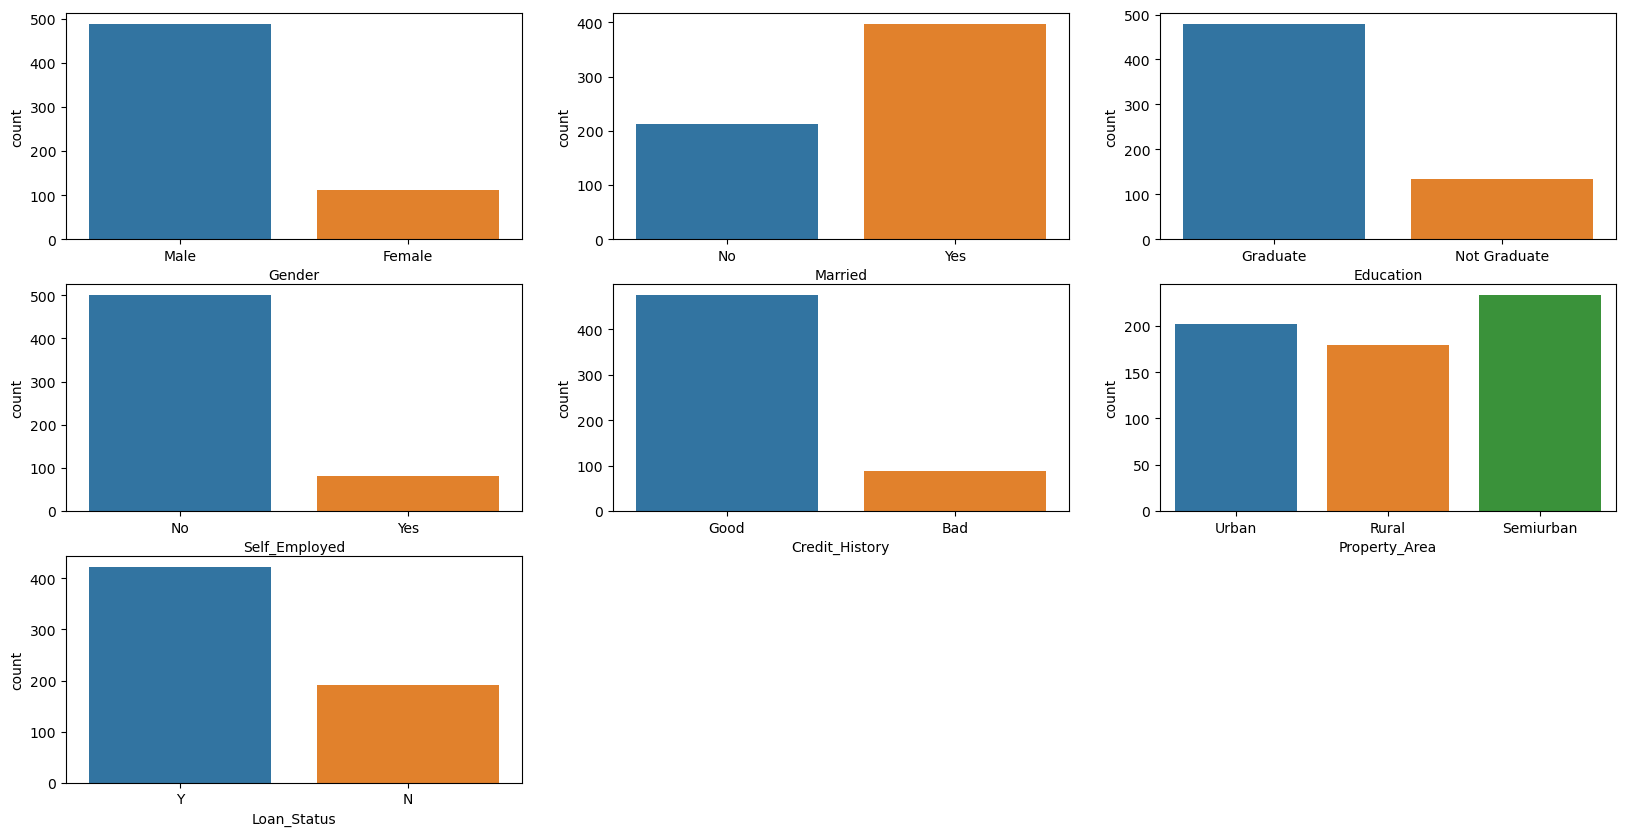

In [95]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.countplot(x=df["Gender"])

plt.subplot(3,3,2)
sns.countplot(x=df["Married"])

plt.subplot(3,3,3)
sns.countplot(x=df["Education"])

plt.subplot(3,3,4)
sns.countplot(x=df["Self_Employed"])

plt.subplot(3,3,5)
sns.countplot(x=df["Credit_History"])

plt.subplot(3,3,6)
sns.countplot(x=df["Property_Area"])

plt.subplot(3,3,7)
sns.countplot(x=df["Loan_Status"])
plt.show()

**Bivariate Analysis**
- Categorical-Categorical
- Categorical-Numerical
- Numerical-Numerical

**Categorical-Categorical**

**1.Loan_Status-Gender**

In [96]:
pd.crosstab(df["Loan_Status"],df["Gender"],normalize="columns")*100

Gender,Female,Male
Loan_Status,,
N,33.035714,30.674847
Y,66.964286,69.325153


<Axes: xlabel='Gender', ylabel='Loan_Status'>

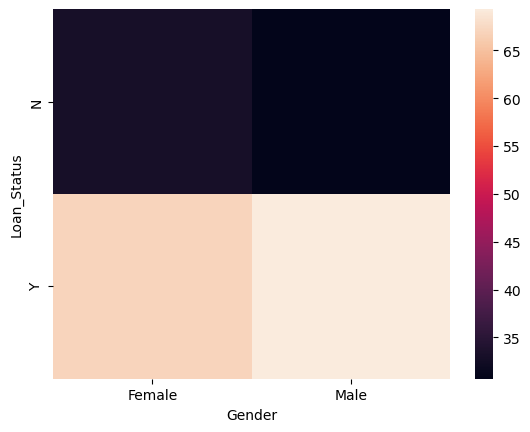

In [97]:
sns.heatmap(pd.crosstab(df["Loan_Status"],df["Gender"],normalize="columns")*100)

**2.Loan_status-Married**

In [98]:
pd.crosstab(df["Loan_Status"],df["Married"],normalize="columns")*100

Married,No,Yes
Loan_Status,,
N,37.089202,28.39196
Y,62.910798,71.60804


<Axes: xlabel='Married', ylabel='Loan_Status'>

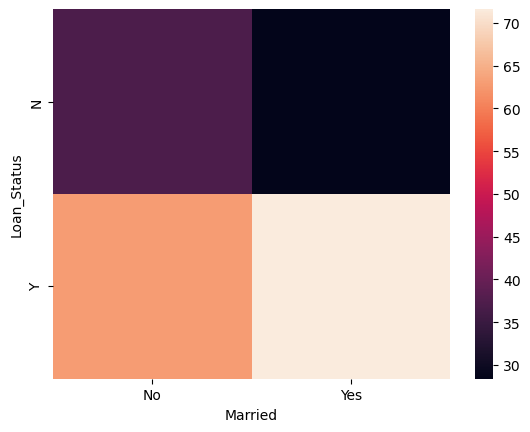

In [99]:
sns.heatmap(pd.crosstab(df["Loan_Status"],df["Married"],normalize="columns")*100)

**3.Loan_status-Education**

In [100]:
pd.crosstab(df["Loan_Status"],df["Education"],normalize="columns")*100

Education,Graduate,Not Graduate
Loan_Status,,
N,29.166667,38.80597
Y,70.833333,61.19403


<Axes: xlabel='Education', ylabel='Loan_Status'>

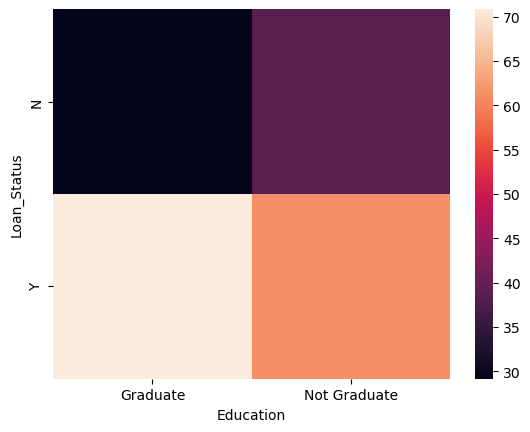

In [101]:
sns.heatmap(pd.crosstab(df["Loan_Status"],df["Education"],normalize="columns")*100)

**4.Loan_status-Self_Employed**

In [102]:
pd.crosstab(df["Loan_Status"],df["Self_Employed"],normalize="columns")*100

Self_Employed,No,Yes
Loan_Status,,
N,31.4,31.707317
Y,68.6,68.292683


<Axes: xlabel='Self_Employed', ylabel='Loan_Status'>

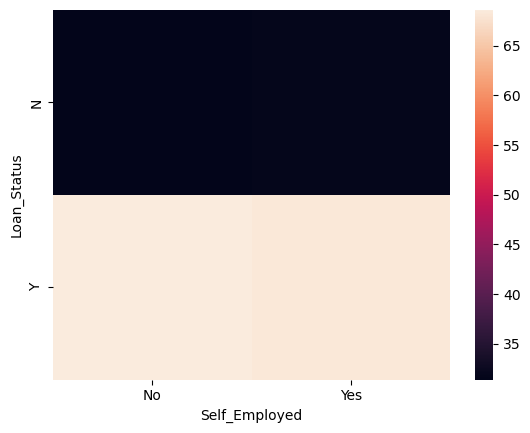

In [103]:
sns.heatmap(pd.crosstab(df["Loan_Status"],df["Self_Employed"],normalize="columns")*100)

**5.Loan_status-Credit_History**

In [104]:
pd.crosstab(df["Loan_Status"],df["Credit_History"],normalize="columns")*100

Credit_History,Bad,Good
Loan_Status,,
N,92.134831,20.421053
Y,7.865169,79.578947


<Axes: xlabel='Credit_History', ylabel='Loan_Status'>

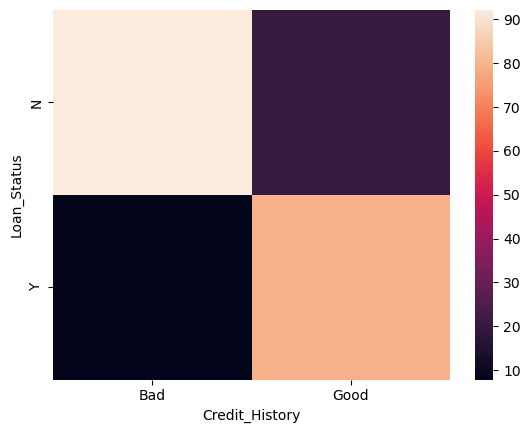

In [105]:
sns.heatmap(pd.crosstab(df["Loan_Status"],df["Credit_History"],normalize="columns")*100)

**6.Loan_status-Property_Area**

In [106]:
pd.crosstab(df["Loan_Status"],df["Property_Area"],normalize="columns")*100

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,38.547486,23.175966,34.158416
Y,61.452514,76.824034,65.841584


<Axes: xlabel='Property_Area', ylabel='Loan_Status'>

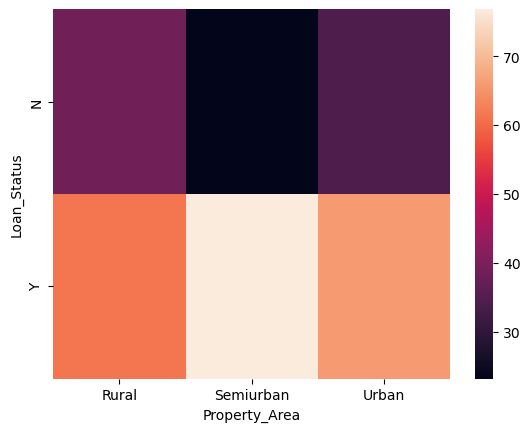

In [107]:
sns.heatmap(pd.crosstab(df["Loan_Status"],df["Property_Area"],normalize="columns")*100)

**Skewness**

In [108]:
df[continuous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

**Missing values**

In [109]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [110]:
df.isnull().sum()/len(df)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

**Duplicates**

In [111]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [112]:
df.duplicated().sum()

0

# Step-3: Data Preprocessing
- Feature selection
- Feature Engineering
- Data cleaning
  - wrong data
  - missing values
  - wrong data type
  - duplicates
  - outliers
- Data Wrangling
  - Feature Transformation(applicable on continuous)
  - Feature scaling(applicable on continuous)
  - Encoding(applicable on discrete categorical)
- **Dont apply any Data Wrangling technique on count variable**

**Feature Selection**
- Feature selection can be done here,we can drop column Loan_ID

In [113]:
df.drop("Loan_ID",axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Good,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Good,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Good,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Good,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Good,Urban,Y


**Feature Engineering**
- ApplicantIncome, CoapplicantIncome

In [114]:
df["Income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["Income"]

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Income, Length: 614, dtype: float64

In [115]:
df.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,Good,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,Good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,Good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,Good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,Good,Urban,Y,6000.0


**7.Loan_status-Income**

In [116]:
pd.crosstab(df["Loan_Status"],df["Income"],normalize="columns")*100

Income,1442.0,1830.0,1880.0,1950.0,1963.0,2000.0,2138.0,2165.0,2178.0,2213.0,...,27500.0,33846.0,35673.0,37719.0,39999.0,42083.0,43897.0,51763.0,63337.0,81000.0
Loan_Status,,,,,,,,,,,,,,,,,,,,,
N,100.0,100.0,100.0,100.0,0.0,100.0,100.0,0.0,100.0,0.0,...,0.0,100.0,100.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0
Y,0.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0,100.0,...,100.0,0.0,0.0,100.0,100.0,0.0,100.0,100.0,100.0,0.0


**Data Cleaning**
- wrong data
- Missing values
- wrong Datatype
- Duplicates
- outliers

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Dependents        599 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   LoanAmount        592 non-null    float64
 6   Loan_Amount_Term  600 non-null    float64
 7   Credit_History    564 non-null    object 
 8   Property_Area     614 non-null    object 
 9   Loan_Status       614 non-null    object 
 10  Income            614 non-null    float64
dtypes: float64(3), object(8)
memory usage: 52.9+ KB


**wrong data**

In [118]:
df["Dependents"].replace({"3+":3},inplace=True)
df["Loan_Status"].replace({"Y":"Yes","N":"No"},inplace=True)

In [119]:
df["Dependents"].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

In [120]:
df["Loan_Status"].value_counts()

Loan_Status
Yes    422
No     192
Name: count, dtype: int64

**Missing values**

In [121]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,Good,Urban,Yes,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,Good,Rural,No,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,Good,Urban,Yes,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,Good,Urban,Yes,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,Good,Urban,Yes,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,Good,Rural,Yes,2900.0
610,Male,Yes,3,Graduate,No,40.0,180.0,Good,Rural,Yes,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,Good,Urban,Yes,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,Good,Urban,Yes,7583.0


In [122]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [123]:
df.isnull().sum()/len(df)

Gender              0.021173
Married             0.004886
Dependents          0.024430
Education           0.000000
Self_Employed       0.052117
LoanAmount          0.035831
Loan_Amount_Term    0.022801
Credit_History      0.081433
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [124]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)

In [125]:
df["Dependents"]=df["Dependents"].fillna(0)

In [126]:
df=df.dropna(subset=["LoanAmount","Loan_Amount_Term","Credit_History"])
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360.0,Good,Rural,No,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,Good,Urban,Yes,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,Good,Urban,Yes,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,Good,Urban,Yes,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,Good,Urban,Yes,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,Good,Rural,Yes,2900.0
610,Male,Yes,3,Graduate,No,40.0,180.0,Good,Rural,Yes,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,Good,Urban,Yes,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,Good,Urban,Yes,7583.0


In [127]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

**Duplicates**

In [128]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 529, dtype: bool

In [129]:
df.duplicated().sum()

0

**Outliers**
- Here no need of removing the outliers,because paying the loanAmount purely varies from customer to customer and the loanAmount paid by the customer may be insignificant.

**Skewness**

In [130]:
df[["Income","LoanAmount"]].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [131]:
from scipy.stats import boxcox
df["Income"],a=boxcox(df["Income"])
df["LoanAmount"],c=boxcox(df["LoanAmount"])

In [132]:
df[["Income","LoanAmount"]].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

**Encoding**

In [133]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,6.243267,360.0,Good,Rural,No,1.864967
2,Male,Yes,0,Graduate,Yes,5.202610,360.0,Good,Urban,Yes,1.856556
3,Male,Yes,0,Not Graduate,No,6.138816,360.0,Good,Urban,Yes,1.862802
4,Male,No,0,Graduate,No,6.401083,360.0,Good,Urban,Yes,1.864819
5,Male,Yes,2,Graduate,Yes,7.481930,360.0,Good,Urban,Yes,1.868932


In [134]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Income'],
      dtype='object')

In [135]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0}).astype("int")
df["Married"]=df["Married"].map({"Yes":1,"No":0}).astype("int")
df["Education"]=df["Education"].map({"Graduate":1,"Not Graduate":0}).astype("int")
df["Self_Employed"]=df["Self_Employed"].map({"Yes":1,"No":0}).astype("int")
df["Property_Area"]=df["Property_Area"].map({"Rural":0,"Semiurban":1,"Urban":2}).astype("int")
df["Credit_History"]=df["Credit_History"].map({"Good":1,"Bad":0}).astype("int")
df["Loan_Status"]=df["Loan_Status"].map({"Yes":1,"No":0}).astype("int")

In [136]:
df["Dependents"]=df["Dependents"].astype("int")
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype("int")

In [137]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"]/12

In [138]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1,1.864819
5,1,1,2,1,1,7.481930,30.0,1,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1,1.856069
610,1,1,3,1,0,4.460305,15.0,1,0,1,1.860675
611,1,1,1,1,0,7.388070,30.0,1,2,1,1.867771
612,1,1,2,1,0,6.870558,30.0,1,2,1,1.866991


In [139]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.820416,0.644612,0.763705,0.795841,0.132325,6.267071,28.529301,0.850662,1.018904,0.691871,1.863810
std,0.384204,0.479084,1.020122,0.403467,0.339165,0.823222,5.405139,0.356759,0.778269,0.462157,0.005059
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.457005,3.000000,0.000000,0.000000,0.000000,1.843796
25%,1.000000,0.000000,0.000000,1.000000,0.000000,5.847354,30.000000,1.000000,0.000000,0.000000,1.860850
50%,1.000000,1.000000,0.000000,1.000000,0.000000,6.243267,30.000000,1.000000,1.000000,1.000000,1.863618
75%,1.000000,1.000000,2.000000,1.000000,0.000000,6.680885,30.000000,1.000000,2.000000,1.000000,1.866943
max,1.000000,1.000000,3.000000,1.000000,1.000000,9.249850,40.000000,1.000000,2.000000,1.000000,1.878729


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 1 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            529 non-null    int32  
 1   Married           529 non-null    int32  
 2   Dependents        529 non-null    int32  
 3   Education         529 non-null    int32  
 4   Self_Employed     529 non-null    int32  
 5   LoanAmount        529 non-null    float64
 6   Loan_Amount_Term  529 non-null    float64
 7   Credit_History    529 non-null    int32  
 8   Property_Area     529 non-null    int32  
 9   Loan_Status       529 non-null    int32  
 10  Income            529 non-null    float64
dtypes: float64(3), int32(8)
memory usage: 33.1 KB


# Step-4: Modelling & Evaluation

In [141]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=True)

In [143]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
333,1,1,0,1,0,8.575696,15.0,1,2,1.878079
372,1,1,2,1,1,8.109619,25.0,1,0,1.872774
409,1,1,3,1,0,8.012017,30.0,0,0,1.878729
7,1,1,3,1,0,6.588770,30.0,0,1,1.864016
568,0,0,0,1,0,2.457005,30.0,1,2,1.853032
...,...,...,...,...,...,...,...,...,...,...
155,1,1,3,1,0,8.955539,15.0,0,1,1.876610
172,1,1,3,0,0,5.517040,15.0,1,0,1.858747
88,1,0,0,1,0,7.067305,30.0,1,2,1.868019
275,1,1,1,1,0,6.070304,30.0,1,1,1.861985


In [144]:
y_train

333    1
372    1
409    0
7      0
568    0
      ..
155    1
172    0
88     1
275    1
47     1
Name: Loan_Status, Length: 423, dtype: int32

In [145]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
41,1,0,0,1,0,4.695313,30.0,1,2,1.856618
450,1,1,2,0,0,6.204805,30.0,0,0,1.858902
286,0,0,0,1,1,5.831442,25.0,1,1,1.861272
124,1,1,0,0,0,6.932643,30.0,1,0,1.865316
38,1,0,0,1,0,6.843308,30.0,1,2,1.870169
...,...,...,...,...,...,...,...,...,...,...
358,1,1,0,0,0,5.847354,40.0,0,2,1.862166
403,0,0,0,0,0,4.872871,30.0,1,1,1.849778
455,1,1,2,1,0,5.782820,30.0,1,1,1.859914
239,1,1,1,1,0,5.782820,30.0,1,1,1.857942


In [146]:
y_test

41     1
450    0
286    0
124    1
38     1
      ..
358    0
403    1
455    1
239    1
320    1
Name: Loan_Status, Length: 106, dtype: int32

In [147]:
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
1,1,1,1,1,0,6.243267,30.0,1,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1,2,1.856556
3,1,1,0,0,0,6.138816,30.0,1,2,1.862802
4,1,0,0,1,0,6.401083,30.0,1,2,1.864819
5,1,1,2,1,1,7.481930,30.0,1,2,1.868932
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1,0,1.856069
610,1,1,3,1,0,4.460305,15.0,1,0,1.860675
611,1,1,1,1,0,7.388070,30.0,1,2,1.867771
612,1,1,2,1,0,6.870558,30.0,1,2,1.866991


In [148]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 529, dtype: int32

In [149]:
#Modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=True)
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
#Prediction & Evaluation on train data
ypred_train=model_log.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#Prediction & Evaluation on test data
ypred_test=model_log.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print("cv:",cross_val_score(model_log,x_train,y_train,cv=5,scoring="accuracy").mean())

Train Accuracy: 0.8085106382978723
Test Accuracy: 0.839622641509434
cv: 0.803781512605042


In [150]:
train=[]
test=[]
cv=[]

for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)

    model_log.fit(x_train,y_train)
    
    ypred_train=model_log.predict(x_train)
    ypred_test=model_log.predict(x_test)
   
    train.append(accuracy_score(y_train,ypred_train))
    test.append(accuracy_score(y_test,ypred_test))
    
    cv.append(cross_val_score(model_log,x_train,y_train,cv=5,scoring="accuracy").mean())

In [151]:
train

[0.8085106382978723,
 0.8085106382978723,
 0.8108747044917257,
 0.8037825059101655,
 0.8085106382978723,
 0.789598108747045,
 0.8085106382978723,
 0.8274231678486997,
 0.817966903073286,
 0.8226950354609929,
 0.8226950354609929,
 0.817966903073286,
 0.8274231678486997,
 0.8014184397163121,
 0.8132387706855791,
 0.806146572104019,
 0.8226950354609929,
 0.8132387706855791,
 0.817966903073286,
 0.8132387706855791,
 0.8156028368794326,
 0.8085106382978723,
 0.8132387706855791,
 0.8108747044917257,
 0.8037825059101655,
 0.8226950354609929,
 0.8156028368794326,
 0.8132387706855791,
 0.8416075650118203,
 0.8203309692671394,
 0.8156028368794326,
 0.8226950354609929,
 0.8274231678486997,
 0.8085106382978723,
 0.8085106382978723,
 0.8108747044917257,
 0.8156028368794326,
 0.817966903073286,
 0.8085106382978723,
 0.817966903073286,
 0.8132387706855791,
 0.8108747044917257,
 0.8085106382978723,
 0.8132387706855791,
 0.817966903073286,
 0.8156028368794326,
 0.817966903073286,
 0.806146572104019,
 0

In [152]:
test

[0.839622641509434,
 0.8301886792452831,
 0.8301886792452831,
 0.8584905660377359,
 0.839622641509434,
 0.9150943396226415,
 0.839622641509434,
 0.7641509433962265,
 0.8018867924528302,
 0.7735849056603774,
 0.7830188679245284,
 0.8018867924528302,
 0.7641509433962265,
 0.8584905660377359,
 0.8207547169811321,
 0.8490566037735849,
 0.7830188679245284,
 0.8207547169811321,
 0.8018867924528302,
 0.8207547169811321,
 0.8113207547169812,
 0.839622641509434,
 0.8207547169811321,
 0.8301886792452831,
 0.8584905660377359,
 0.7830188679245284,
 0.8113207547169812,
 0.8207547169811321,
 0.7075471698113207,
 0.7924528301886793,
 0.8113207547169812,
 0.7830188679245284,
 0.7641509433962265,
 0.839622641509434,
 0.839622641509434,
 0.8301886792452831,
 0.8113207547169812,
 0.8018867924528302,
 0.839622641509434,
 0.7924528301886793,
 0.8207547169811321,
 0.8301886792452831,
 0.839622641509434,
 0.8207547169811321,
 0.8018867924528302,
 0.8113207547169812,
 0.8018867924528302,
 0.839622641509434,
 

In [153]:
cv

[0.803781512605042,
 0.808515406162465,
 0.8109523809523809,
 0.803781512605042,
 0.8083473389355742,
 0.7897198879551821,
 0.8060504201680672,
 0.8250420168067226,
 0.8179551820728292,
 0.817955182072829,
 0.8203641456582634,
 0.8180112044817929,
 0.8274509803921569,
 0.801372549019608,
 0.8108963585434174,
 0.8061064425770308,
 0.8226610644257704,
 0.8108403361344537,
 0.8178151260504201,
 0.8132492997198881,
 0.8155182072829131,
 0.8083473389355742,
 0.8133613445378151,
 0.8108963585434175,
 0.8037535014005602,
 0.8180112044817927,
 0.815686274509804,
 0.8133053221288516,
 0.8417086834733893,
 0.8179831932773108,
 0.815546218487395,
 0.8225770308123248,
 0.824985994397759,
 0.8085434173669468,
 0.8085994397759105,
 0.8084313725490195,
 0.8131932773109243,
 0.8180672268907564,
 0.8085434173669468,
 0.8181232492997198,
 0.8131652661064426,
 0.8109243697478992,
 0.8085434173669469,
 0.8132212885154061,
 0.8179271708683473,
 0.815546218487395,
 0.8157142857142858,
 0.808515406162465,
 0

In [154]:
df1=pd.DataFrame({"Train":train,"Test":test,"CV":cv})
df1

,Train,Test,CV
0,0.808511,0.839623,0.803782
1,0.808511,0.830189,0.808515
2,0.810875,0.830189,0.810952
3,0.803783,0.858491,0.803782
4,0.808511,0.839623,0.808347
...,...,...,...
95,0.822695,0.783019,0.820420
96,0.810875,0.830189,0.810812
97,0.817967,0.801887,0.818039
98,0.808511,0.839623,0.808571


In [155]:
fm=df1[(abs(df1["Train"]-df1["CV"])<=0.05) & (abs(df1["Train"]-df1["Test"])<=0.05)]
fm

,Train,Test,CV
0,0.808511,0.839623,0.803782
1,0.808511,0.830189,0.808515
2,0.810875,0.830189,0.810952
4,0.808511,0.839623,0.808347
6,0.808511,0.839623,0.806050
...,...,...,...
94,0.810875,0.820755,0.805994
95,0.822695,0.783019,0.820420
96,0.810875,0.830189,0.810812
97,0.817967,0.801887,0.818039


In [156]:
fm[fm["CV"]==fm["CV"].max()]

,Train,Test,CV
69,0.822695,0.783019,0.822773


In [157]:
rs=fm[fm["CV"]==fm["CV"].max()].index.to_list()[0]
print("Best random state number:",rs)

Best random state number: 69


In [158]:
train=[]
test=[]
cv=[]

for i in range(1,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=i)

    model_log.fit(x_train,y_train)
    
    ypred_train=model_log.predict(x_train)
    ypred_test=model_log.predict(x_test)
   
    train.append(accuracy_score(y_train,ypred_train))
    test.append(accuracy_score(y_test,ypred_test))
    
    cv.append(cross_val_score(model_log,x_train,y_train,cv=5,scoring="accuracy").mean())
    
df1=pd.DataFrame({"Train":train,"Test":test,"CV":cv})
fm=df1[(abs(df1["Train"]-df1["CV"])<=0.05) & (abs(df1["Train"]-df1["Test"])<=0.05)]
rs=fm[fm["CV"]==fm["CV"].max()].index.to_list()[0]
print("Best random state number:",rs)

Best random state number: 69


In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)

# Machine learning Algorithms
- **Logistic Regression**
- **KNN**
- **SVM**
- **Decision Tree classifier**
- **Random Forest classifier**
- **Ada Boost Classifier**
- **GradientBoosting Classifier**
- **XG Boost Classifier**

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 1.Logistic Regression

In [161]:
#Modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression(random_state=97)
model_log.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=model_log.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(model_log,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=model_log.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8108747044917257
CV Score: 0.8108683473389355
Test Accuracy: 0.8301886792452831


**confusion matrix**

In [162]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

[[15 16]
 [ 2 73]]


**classification report**

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        31
           1       0.82      0.97      0.89        75

    accuracy                           0.83       106
   macro avg       0.85      0.73      0.76       106
weighted avg       0.84      0.83      0.81       106



**AUC curve**

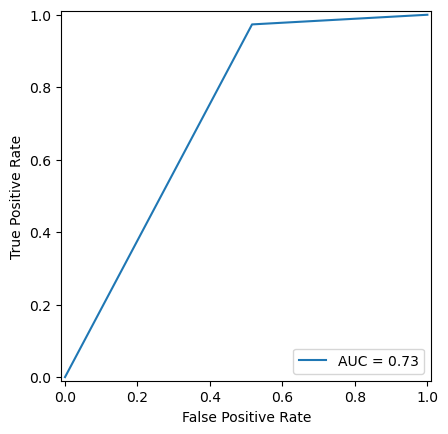

In [164]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds=roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [165]:
#AUC Score
from sklearn.metrics import roc_auc_score
print("AUC Score:",roc_auc_score(y_test,ypred_test))

AUC Score: 0.7286021505376344


# 2.KNN
- Hyperparameter Tuning
- Modelling & Evaluation

In [166]:
#Modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
from sklearn.neighbors import KNeighborsClassifier
knn_grid=KNeighborsClassifier()
knn_grid.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=knn_grid.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(knn_grid,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=knn_grid.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8156028368794326
CV Score: 0.7281792717086835
Test Accuracy: 0.7924528301886793


In [167]:
#Hyperparameter Tuning
estimator=KNeighborsClassifier()
param_grid={"n_neighbors":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
knn_grid.fit(x_train,y_train)

#KNN with best Hyperparameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [168]:
#Hyperparameter Tuning
estimator=KNeighborsClassifier()
param_grid={"n_neighbors":list(range(1,101))}

from sklearn.model_selection import GridSearchCV
knn_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
knn_grid.fit(x_train,y_train)

#KNN with best Hyperparameters
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [169]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [170]:
#Modelling
knn_model=knn_grid.best_estimator_
knn_model.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=knn_model.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=knn_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.7825059101654847
CV Score: 0.7423529411764707
Test Accuracy: 0.7924528301886793


**confusion matrix**

In [171]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

[[12 19]
 [ 3 72]]


**classification report**

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52        31
           1       0.79      0.96      0.87        75

    accuracy                           0.79       106
   macro avg       0.80      0.67      0.69       106
weighted avg       0.79      0.79      0.77       106



# 3.Support Vector Machine(SVM)
- Hyperparameter Tuning
- Modelling & Evaluation

In [173]:
#Modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
from sklearn.svm import SVC
svm_grid=SVC(random_state=69)
svm_grid.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=svm_grid.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(svm_grid,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=svm_grid.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.6879432624113475
CV Score: 0.6879551820728291
Test Accuracy: 0.7075471698113207


In [174]:
#Hyperparameter Tuning
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
from sklearn.svm import SVC
estimator=SVC()
param_grid={"C":[0.1],"kernel":["linear","rbf","poly","sigmoid"]}

from sklearn.model_selection import GridSearchCV
svm_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
svm_grid.fit(x_train,y_train)

#SVM with best Hyperparameters
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

In [175]:
#Modelling
svm_model=svm_grid.best_estimator_
svm_model.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=svm_model.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(svm_model,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=svm_model.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8108747044917257
CV Score: 0.8108683473389355
Test Accuracy: 0.8301886792452831


**confusion matrix**

In [176]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

[[15 16]
 [ 2 73]]


**classification report**

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        31
           1       0.82      0.97      0.89        75

    accuracy                           0.83       106
   macro avg       0.85      0.73      0.76       106
weighted avg       0.84      0.83      0.81       106



# 4.Decision Tree classifier
- Hyperparameter Tuning
- Identify important features by using feature selection(ensemble method)
- Modelling & Evaluation

**First create default DT model(fully grown tree without any pruning) so that,we can understand the max_depth**

In [178]:
#Modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
from sklearn.tree import DecisionTreeClassifier
dt_grid=DecisionTreeClassifier(random_state=69)
dt_grid.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=dt_grid.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(dt_grid,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=dt_grid.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 1.0
CV Score: 0.72109243697479
Test Accuracy: 0.7924528301886793


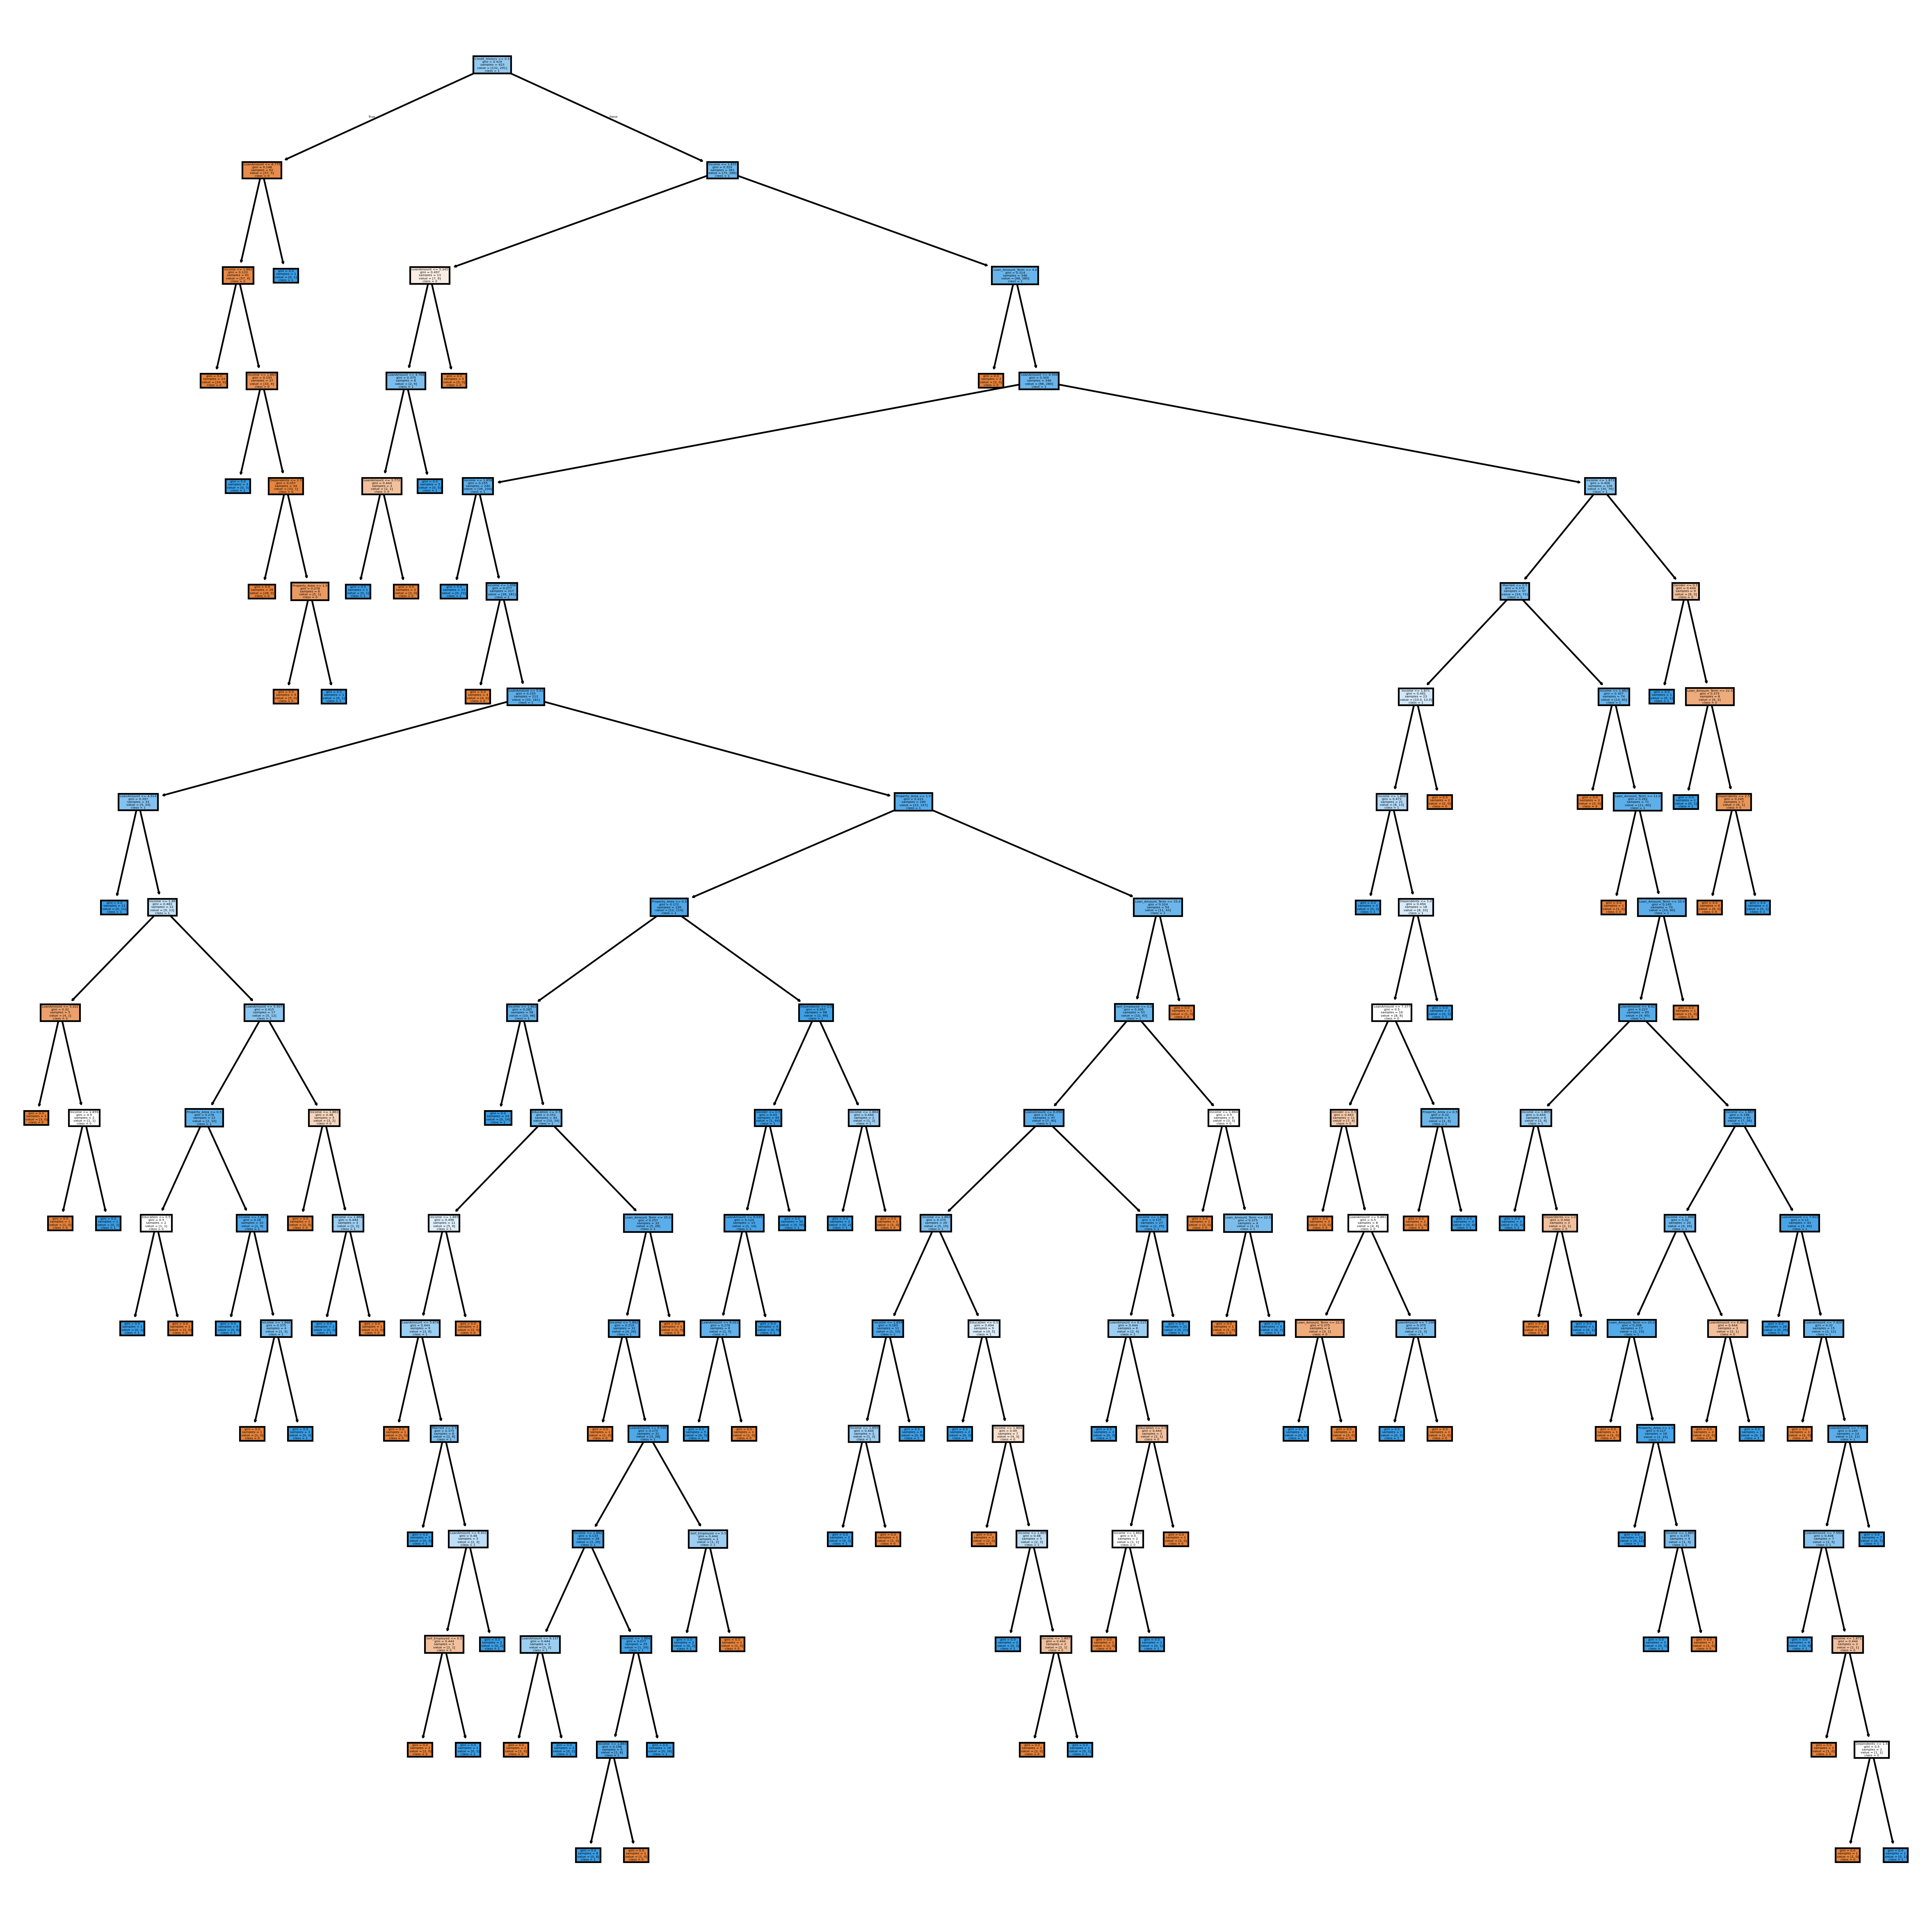

In [179]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(dt_grid,filled=True,
          feature_names=x_train.columns.tolist(),
          class_names=["0","1"])
plt.show()

In [180]:
#Hyper parameter tuning
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
estimator=DecisionTreeClassifier(random_state=69)

param_grid={"criterion":["gini","entropy"],
            "max_depth":list(range(1,20))}

from sklearn.model_selection import GridSearchCV
dt_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
dt_grid.fit(x_train,y_train)

dt_grid.best_params_
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=1, random_state=69)

In [181]:
#Important features 
feats_dt=pd.DataFrame(data=dt.feature_importances_,
                      index=x.columns,
                      columns=["Importance"])

Important_features_dt=feats_dt[feats_dt["Importance"]>0].index.tolist()
Important_features_dt

['Credit_History']

**creating Decision Tree model with important parameters and important features**

In [182]:
#Selecting train & test data
x_train_dt=x_train[Important_features_dt]
x_test_dt=x_test[Important_features_dt]

#Modelling
dt=dt_grid.best_estimator_
dt.fit(x_train_dt,y_train)

#Prediction & Evaluation on train data
ypred_train=dt.predict(x_train_dt)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(dt,x_train_dt,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=dt.predict(x_test_dt)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8108747044917257
CV Score: 0.8108683473389355
Test Accuracy: 0.8301886792452831


# 5.Random Forest classifier
- Hyperparameter Tuning
- Identify important features
- Modelling & Evaluation

In [183]:
#Modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
from sklearn.ensemble import RandomForestClassifier
rf_grid=RandomForestClassifier(random_state=69)
rf_grid.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=rf_grid.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(rf_grid,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=rf_grid.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 1.0
CV Score: 0.8132212885154061
Test Accuracy: 0.8301886792452831


In [184]:
#Hyper parameter tuning
estimator=RandomForestClassifier(random_state=69)

param_grid={"n_estimators":list(range(1,101))}

from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
rf_grid.fit(x_train,y_train)

rf_grid.best_params_
rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=65, random_state=69)

In [185]:
#Important features 
feats_rf=pd.DataFrame(data=rf.feature_importances_,
                      index=x.columns,
                      columns=["Importance"])

Important_features_rf=feats_rf[feats_rf["Importance"]>0].index.tolist()
Important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [186]:
#Selecting train & test data
x_train_rf=x_train[Important_features_rf]
x_test_rf=x_test[Important_features_rf]

#Modelling
rf=rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

#Prediction & Evaluation on train data
ypred_train=rf.predict(x_train_rf)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=rf.predict(x_test_rf)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 1.0
CV Score: 0.817955182072829
Test Accuracy: 0.8113207547169812


# 6.AdaBoost Classifier

In [187]:
#Modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
from sklearn.ensemble import AdaBoostClassifier
ab_grid=AdaBoostClassifier(random_state=69)
ab_grid.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=ab_grid.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(ab_grid,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=ab_grid.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8416075650118203
CV Score: 0.7777310924369749
Test Accuracy: 0.8113207547169812


In [188]:
# Hyperparameter Tuning
estimator=AdaBoostClassifier(random_state=69)
param_grid={"n_estimators":list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
ab_grid.fit(x_train,y_train)

ab_grid.best_params_
ab=ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=1, random_state=69)

In [189]:
#Important features 
feats_ab=pd.DataFrame(data=ab.feature_importances_,
                      index=x.columns,
                      columns=["Importance"])

Important_features_ab=feats_ab[feats_ab["Importance"]>0].index.tolist()
Important_features_ab

['Credit_History']

In [190]:
#Selecting train & test data
x_train_ab=x_train[Important_features_ab]
x_test_ab=x_test[Important_features_ab]

#Modelling
ab=ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

#Prediction & Evaluation on train data
ypred_train=ab.predict(x_train_ab)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(ab,x_train_ab,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=ab.predict(x_test_ab)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8108747044917257
CV Score: 0.8108683473389355
Test Accuracy: 0.8301886792452831


# 7.GradientBoosting Classifier

In [191]:
#Modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
from sklearn.ensemble import GradientBoostingClassifier
gb_grid=GradientBoostingClassifier(random_state=69)
gb_grid.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=gb_grid.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(gb_grid,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=gb_grid.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9101654846335697
CV Score: 0.7778711484593837
Test Accuracy: 0.8301886792452831


In [192]:
# Hyperparameter Tuning
estimator=GradientBoostingClassifier(random_state=69)
param_grid={"n_estimators":list(range(1,10)),"learning_rate":[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

from sklearn.model_selection import GridSearchCV
gb_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
gb_grid.fit(x_train,y_train)

gb_grid.best_params_
gb=gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.3, n_estimators=3, random_state=69)

In [193]:
#Important features 
feats_gb=pd.DataFrame(data=gb.feature_importances_,
                      index=x.columns,
                      columns=["Importance"])

Important_features_gb=feats_gb[feats_gb["Importance"]>0].index.tolist()
Important_features_gb

['Married', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Income']

In [194]:
#Selecting train & test data
x_train_gb=x_train[Important_features_gb]
x_test_gb=x_test[Important_features_gb]

#Modelling
gb=gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)

#Prediction & Evaluation on train data
ypred_train=gb.predict(x_train_gb)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(gb,x_train_gb,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=gb.predict(x_test_gb)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8226950354609929
CV Score: 0.7943417366946779
Test Accuracy: 0.8301886792452831


# 8.XG Boost Classifier

In [195]:
#Modelling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=69)
from xgboost import XGBClassifier
xgb_grid=XGBClassifier(random_state=69)
xgb_grid.fit(x_train,y_train)

#Prediction & Evaluation on train data
ypred_train=xgb_grid.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(xgb_grid,x_train,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=xgb_grid.predict(x_test)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 1.0
CV Score: 0.7635014005602241
Test Accuracy: 0.7735849056603774


In [196]:
# Hyperparameter Tuning
estimator=XGBClassifier(random_state=69)
param_grid={"n_estimators":list(range(1,10)),"max_depth":list(range(1,21)),"gamma":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

from sklearn.model_selection import GridSearchCV
xgb_grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
xgb_grid.fit(x_train,y_train)

xgb_grid.best_params_
xgb=xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=9, n_jobs=None,
              num_parallel_tree=None, random_state=69, ...)

In [197]:
#Important features 
feats_xgb=pd.DataFrame(data=xgb.feature_importances_,
                      index=x.columns,
                      columns=["Importance"])

Important_features_xgb=feats_xgb[feats_xgb["Importance"]>0].index.tolist()
Important_features_xgb

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [198]:
#Selecting train & test data
x_train_xgb=x_train[Important_features_xgb]
x_test_xgb=x_test[Important_features_xgb]

#Modelling
xgb=xgb_grid.best_estimator_
xgb.fit(x_train_xgb,y_train)

#Prediction & Evaluation on train data
ypred_train=xgb.predict(x_train_xgb)
print("Train Accuracy:",accuracy_score(y_train,ypred_train))

#cross validation on train data
print("CV Score:",cross_val_score(xgb,x_train_xgb,y_train,cv=5,scoring="accuracy").mean())

#Prediction & Evaluation on test data
ypred_test=xgb.predict(x_test_xgb)
print("Test Accuracy:",accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8817966903073287
CV Score: 0.8226330532212884
Test Accuracy: 0.8113207547169812


**Predictions on New Data**

In [199]:
from joblib import dump
dump(dt,"loan.joblib")

['loan.joblib']

In [200]:
model=pd.DataFrame({"Loan_ID":["LP002991","LP002992","LP002995"],
                   "Gender":["Male","Male","Female"],
                   "Married":["Yes","Yes","No"],
                   "Dependents":[2,1,0],
                   "Education":["Graduate","Graduate","Not Graduate"],
                   "Self_Employed":["Yes","No","Yes"],
                   "ApplicantIncome":[6000,4583,2000],
                   "CoapplicantIncome":[0.0,1508.0,0.0],
                   "LoanAmount":[128.0,128.0,100.0],
                   "Loan_Amount_Term":[360.0,360.0,480.0],
                   "Credit_History":[0.0,1.0,0.0],
                   "Property_Area":["Urban","Rural","Semiurban"]})
model

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,Yes,2,Graduate,Yes,6000,0.0,128.0,360.0,0.0,Urban
1,LP002992,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP002995,Female,No,0,Not Graduate,Yes,2000,0.0,100.0,480.0,0.0,Semiurban


In [201]:
model["Credit_History"].replace({1:"Good",0:"Bad"},inplace=True)

In [202]:
model

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,Yes,2,Graduate,Yes,6000,0.0,128.0,360.0,Bad,Urban
1,LP002992,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Good,Rural
2,LP002995,Female,No,0,Not Graduate,Yes,2000,0.0,100.0,480.0,Bad,Semiurban


In [203]:
model["Income"]=model["ApplicantIncome"]+model["CoapplicantIncome"]
model["Income"]

0    6000.0
1    6091.0
2    2000.0
Name: Income, dtype: float64

In [204]:
model.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace=True)
model

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,LP002991,Male,Yes,2,Graduate,Yes,128.0,360.0,Bad,Urban,6000.0
1,LP002992,Male,Yes,1,Graduate,No,128.0,360.0,Good,Rural,6091.0
2,LP002995,Female,No,0,Not Graduate,Yes,100.0,480.0,Bad,Semiurban,2000.0


In [205]:
model["Gender"]=model["Gender"].map({"Male":1,"Female":0}).astype("int")
model["Married"]=model["Married"].map({"Yes":1,"No":0}).astype("int")
model["Education"]=model["Education"].map({"Graduate":1,"Not Graduate":0}).astype("int")
model["Self_Employed"]=model["Self_Employed"].map({"Yes":1,"No":0}).astype("int")
model["Property_Area"]=model["Property_Area"].map({"Rural":0,"Semiurban":1,"Urban":2}).astype("int")
model["Credit_History"]=model["Credit_History"].map({"Good":1,"Bad":0}).astype("int")

In [206]:
model["Dependents"]=model["Dependents"].astype("int")
model["Loan_Amount_Term"]=model["Loan_Amount_Term"].astype("int")

In [207]:
model["Loan_Amount_Term"]=model["Loan_Amount_Term"]/12

In [208]:
model

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,LP002991,1,1,2,1,1,128.0,30.0,0,2,6000.0
1,LP002992,1,1,1,1,0,128.0,30.0,1,0,6091.0
2,LP002995,0,0,0,0,1,100.0,40.0,0,1,2000.0


In [209]:
x=model

In [210]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,LP002991,1,1,2,1,1,128.0,30.0,0,2,6000.0
1,LP002992,1,1,1,1,0,128.0,30.0,1,0,6091.0
2,LP002995,0,0,0,0,1,100.0,40.0,0,1,2000.0


In [211]:
x = model[["Credit_History"]]
# Make predictions and create a DataFrame with 'PassengerId' and 'Survived' columns
predictions = dt.predict(x)
loan_model = pd.DataFrame({"Loan_ID":model["Loan_ID"],"Gender":model["Gender"],"Married":model["Married"],"Dependents":model["Dependents"],"Education":model["Education"],"Self_Employed":model["Self_Employed"],"LoanAmount":model["LoanAmount"],"Loan_Amount_Term":model["Loan_Amount_Term"],"Credit_History":model["Credit_History"],"Property_Area":model["Property_Area"],"Income":model["Income"],"Loan_Status": predictions})
loan_model

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income,Loan_Status
0,LP002991,1,1,2,1,1,128.0,30.0,0,2,6000.0,0
1,LP002992,1,1,1,1,0,128.0,30.0,1,0,6091.0,1
2,LP002995,0,0,0,0,1,100.0,40.0,0,1,2000.0,0
